# **Metody eksploracji danych - projekt**
Jakub Mańko, Milad Al Masri

## **Analiza eksploracyjna zbioru danych**

Import potrzebnych bibliotek

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Wczytanie zbioru danych, który będzie elementem projektu

In [83]:
df = pd.read_csv("dataset.csv", index_col=0)
df.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

### **Opisy poszczególnych kolumn w zbiorze**

*   **track_id** - id utworu na Spotify.
*   **artists** - imiona artystów, którzy wykonali utwór.
*   **album_name** - nazwa albumu, w którym znajduje się utwór.
*   **track_name** - nazwa utworu.
*   **popularity** - miara popularności utworu od 0 do 100. Im wyższa wartość, tym bardziej dany utwór jest teraz na czasie.
*   **duration_ms** - długość utworu w milisekundach.
*   **explicit** - czy utwór posiada wulgaryzmy? True - tak, False - nie.
*   **danceability** - miara od 0 do 1 określająca, jak bardzo utwór nadaje się do tańca. Im wyższa wartość, tym lepszy jest to utwór do tańczenia.
*   **energy** - cecha liczbowa z zakresem od 0 do 1 reprezentująca percepcyjną miarę intensywności utworu. Im wyższa wartość, tym bardziej jest dany utwór energiczny.
*   **key** - cecha oznaczająca tonację, w której dany utwór został zapisany. Jest reprezentowana jako liczba całkowita od 0 do 11. Jeśli tonacja jest nieokreślona, cecha przyjmuje wartość -1.
*   **loudness** - ogólna głośność utworu wyrażona w decybelach.
*   **mode** - cecha wskazująca modalność (dur lub moll) utworu, rodzaj skali, z której pochodzi jego treść melodyczna. Liczba 1 oznacza skalę durową, a 0 oznacza skalę molową.
*   **speechiness** - cecha liczbowa z zakresem od 0 do 1 określająca obecność wypowiadanych słów w utworze. Im bardziej nagranie przypomina mowę (np. audiobook), tym wartość cechy jest bliższa 1. Wartości powyżej 0,66 opisują utwory, które prawdopodobnie składają się w całości z wypowiadanych słów.
*   **acousticness** - miara od 0 do 1 określająca prawdopodobieństwo, że utwór jest akustyczny.
*   **instrumentalness** - miara od 0 do 1 przewidująca, czy utwór nie zawiera wokalu. Utwory rapowe będą wyraźnie "wokalne". Im wartość jest bliższa 1, tym większe prawdopodobieństwo, że utwór nie zawiera treści wokalnych.
*   **liveness** - miara od 0 do 1 określająca, czy utwór został wykonany na żywo w obecności publiczności. Im wartość bliższa 1, tym większe prawdopodobieństwo, że utwór został nagrany na żywo z publicznością.
*   **valence** - miara od 0 do 1 opisująca pozytywność przekazywaną przez utwór. Wartości bliższe 1 wskazują, że utwór jest bardziej pozytywny (radosny). Wartości bliższe 0 wskazują, że utwór jest bardziej negatywny (smutny, przygnębiający).
*   **tempo** - ogólne tempo utworu wyrażone w jednostkach metrycznych na minutę (BPM). Im wyższa wartość, tym szybszy jest utwór.
*   **time_signature** - metrum utworu. Przyjmuje wartość od 3 do 7. 3 oznacza 3/4, 4 oznacza 4/4, 5 oznacza 5/4 itd.
*   **track_genre** - gatunek utworu

Usunięcie kolumny track_id, ponieważ kolumna ta jedynie identyfikuje jednoznacznie utwór. Oprócz tego, nie wnosi ona żadnych informacji o utworach.

In [84]:
#Usunięcie kolumny track_id
df = df.drop(df.columns[0], axis=1)

### **Analiza stopnia wypełnienia danych**

Należy sprawdzić, czy są w zbiorze rekordy, które nie mają wartości w niektórych kolumnach. Brakujące wartości mogą znacząco wpłynąć na jakość analizy i modelowania.

In [85]:
#Liczba rekordów z brakującymi danymi
df.isnull().any(axis=1).sum()

1

Jest tylko jeden rekord z brakującymi danymi. Zostanie on teraz wyświetlony.

In [86]:
#Wyświetlenie rekordu z brakującymi danymi
df[df.isnull().any(axis=1)]

artists album_name track_name  popularity  duration_ms  explicit  \
65900     NaN        NaN        NaN           0            0     False   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
65900         0.501   0.583    7     -9.46     0       0.0605          0.69   

       instrumentalness  liveness  valence    tempo  time_signature  \
65900           0.00396    0.0747    0.734  138.391               4   

      track_genre  
65900       k-pop

Utwór ten nie ma autora, nazwy albumu i nazwy utworu. Jako, że jest tylko jeden utwór, który ma brakujące dane, można go po prostu usunąć ze zbioru. Numer wiersza, który opisuje ten utwór, to 65900. Usuwamy zatem wiersz o numerze 65900.

In [87]:
#Usunięcie rekordu z brakującymi danymi
df = df.drop(65900)

### **Zbadanie zakresów i stopnia zmienności**

#### **Histogramy obrazujące rozkłady zmiennych liczbowych**

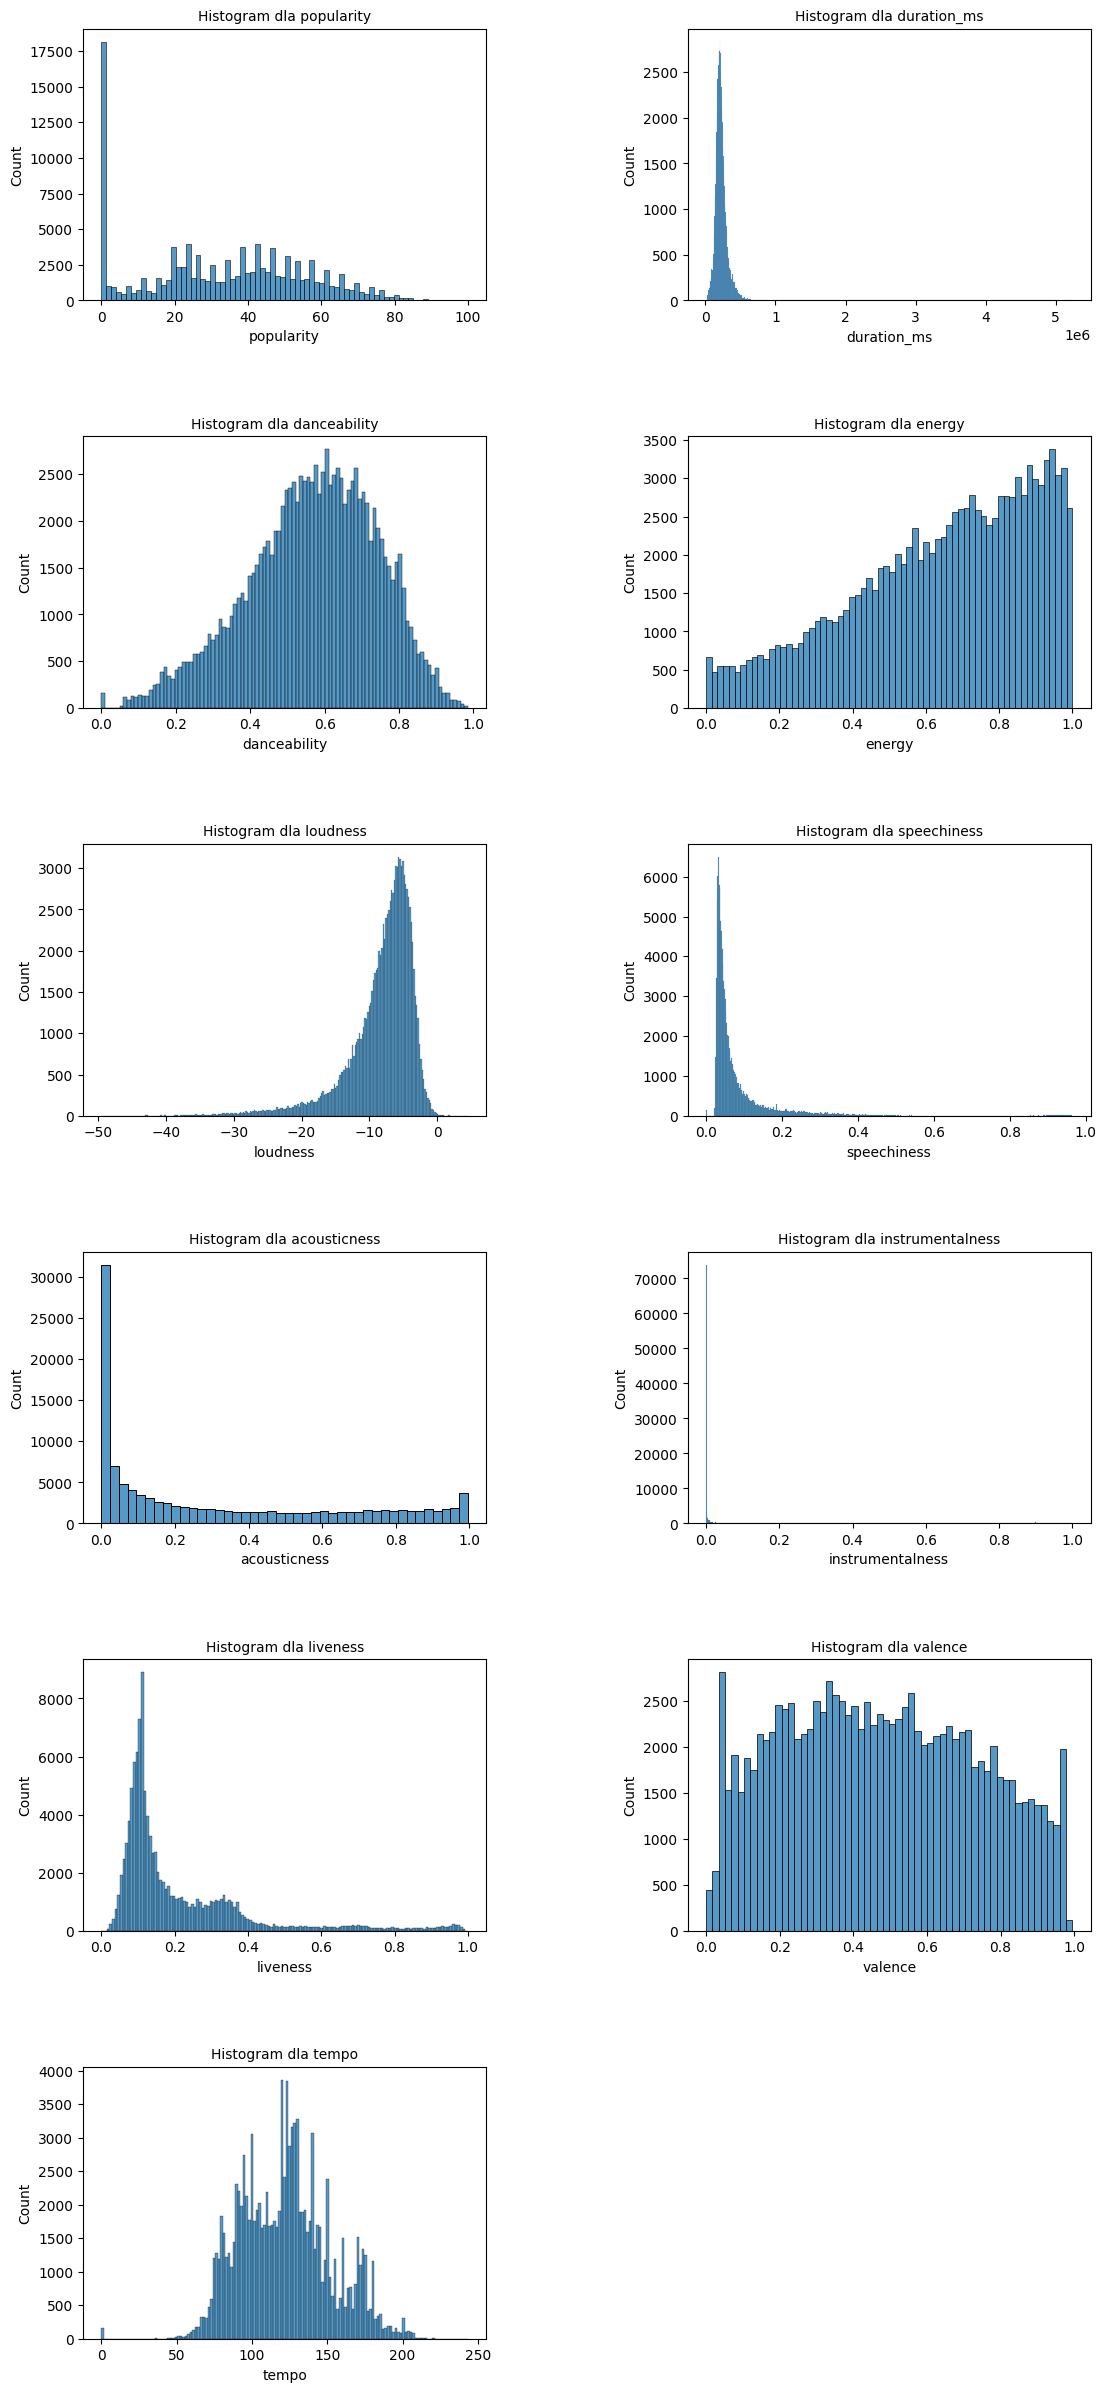

In [88]:
features = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

n_rows = 6
n_cols = 2

plt.figure(figsize=(13, 30))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(x=df[col])
    plt.title(f'Histogram dla {col}', fontsize=10)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

#### **Wnioski**
**popularity**
* Bardzo duża część utworów ma popularity równe lub bliskie 0, co wskazuje, że wiele utworów jest bardzo mało popularnych.

**duration_ms**
* Czas trwania utworu jest bardzo silnie skoncentrowany w niskich wartościach. Najczęściej są to wartości mniejsze niż pół miliona milisekund, czyli ok. 8 minut.
* Rozkład ma długi ogon po prawej stronie, co oznacza obecność nielicznych utworów z dość długim czasem trwania.

**danceability**
* Rozkład bardzo przypomina rozkład normalny.
* Większość wartości jest skoncentrowanych w przedziale 0.4 – 0.8.

**energy**
* Można zauważyć rosnący rozkład - częstotliwość wartości w większości przypadków zwiększa się wraz z energią utworów.

**loudness**
* Wartości zmiennej loudness są skupione w przedziale od ok. -30 dB do 0 dB. Najwięcej utworów znajduje się w zakresie od -15 do ok. -2.5 dB.
* Rozkład przypomina rozkład normalny z lekką asymetrią w lewą stronę.

**speechiness**
* Rozkład jest silnie skośny prawostronnie.
* Zdecydowana większość utworów ma zmienną speechiness w przedziale 0.0 - 0.4, co oznacza, że większość utworów to utwory zawierające niewiele elementów mowy.

**acousticness**
* Duża część wartości jest skoncentrowana w bardzo niskim zakresie (blisko 0), co wskazuje, że dominują utwory z minimalnym prawdopodobieństwem bycia utworami akustycznymi.
* Istnieje niewiele utworów o wysokich wartościach acousticness.

**instrumentalness**
* Zdecydowana większość utworów ma wartości instrumentalness bliskie 0, co oznacza, że zdecydowana większość utworów zawiera wokale.
* Rozkład jest ekstremalnie skośny prawostronnie z dominacją utworów wokalnych.

**liveness**
* Większość wartości jest skoncentrowanych w przedziale 0.0 - 0.4, co sugeruje, że większość utworów to nagrania studyjne.
* Istnieje niewiele utworów z wysoką wartością liveness, która wskazuje, że są to nagrania koncertowe.
* Rozkład jest skośny prawostronnie.

**valence**
* Wartości są dość równomiernie rozłożone, co sugeruje różnorodność emocjonalną utworów.
* Rozkład jest zrównoważony.

**tempo**
* Rozkład przypomina rozkład normalny.
* Zdecydowana większość wartości jest w przedziale 50 BPM - 200 BPM.
* Można zauważyć, że są prawdopodobnie wartości równe 0 BPM. Takie wartości nie są prawidłowe (0 BPM oznacza prawdopodobnie ciszę) i trzeba to zbadać.


### **Analiza spójności wartości zmiennych**
Należy sprawdzić, czy rekordy mają spójne wartości we wszystkich kolumnach.

####**popularity**
Zmienna popularity przyjmuje wartości z zakresu 0 - 100. Sprawdźmy, czy są inne wartości.

In [89]:
#Liczba rekordów, które nie mają popularity w przedziale od 0 do 100
df[~df['popularity'].between(0, 100)].sum(axis=1)

Series([], dtype: object)

Wszystkie wartości są prawidłowe.

####**duration_ms**
Zmienna duration_ms przyjmuje wartości większe od 0. Sprawdźmy, czy są inne wartości.

In [90]:
#Sprawdzenie, czy są rekordy, które mają czas trwania utworu mniejszy lub równy zero
(df['duration_ms'] <= 0).sum()

0

Wszystkie wartości są prawidłowe.

####**Zmienne wyrażające prawdopodobieństwo**
Zmienne wyrażające prawdopodobieństwo (danceability, energy, speechiness, acousticness, instrumentalness, liveness i valence) przyjmują wartości od 0 do 1. Sprawdźmy, czy są inne wartości.

In [91]:
# Do usunięcia
#Liczba rekordów, które nie mają danceability, energy, speechiness, acousticness, instrumentalness, liveness i valence w przedziale od 0 do 1
columns_to_check = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
mask_out_of_range = (df[columns_to_check] < 0) | (df[columns_to_check] > 1)
mask_out_of_range.any(axis=1).sum()

0

Wszystkie wartości tych zmiennych są prawidłowe.

#### **explicit**
Zmienna jest zmienną kategoryczną binarną, która przyjmuje wartości True (1) i False (0). Sprawdźmy, czy są inne wartości.

In [92]:
#Liczba rekordów, które nie mają explicit typu boolean
mask = ~df['explicit'].isin([True, False])
mask.sum()

0

Wszystkie wartości tej zmiennej są prawidłowe.

#### **tempo**
Zmienna tempo przyjmuje wartości liczbowe większe od 0. Sprawdźmy, czy są wartości równe lub mniejsze od 0.

In [93]:
#Liczba rekordów, które mają tempo równe lub mniejsze od 0
(df['tempo'] <= 0).sum()

157

Występuje niewiele utworów z wartością tempo mniejszą lub równą 0. Usuwamy te utwory ze zbioru.

In [94]:
#Usunięcie rekordów z tempem równym lub mniejszym od 0
df = df[df['tempo'] > 0]

#### **time_signature**
Zmienna time_signature jest zmienną kategoryczną, która przyjmuje wartości 3, 4, 5, 6 i 7. Sprawdźmy, czy są inne wartości.

In [95]:
#Liczba rekordów, które nie mają time_signature w przedziale od 3 do 7
mask = ~df['time_signature'].isin([3,4,5,6,7])
mask.sum()

979

Jest niewiele utworów z innymi wartościami time_signature. Te utwory zostają usunięte ze zbioru.

In [96]:
#Usunięcie rekordów, które nie mają time_signature w przedziale od 3 do 7
df = df[(df['time_signature'] >= 3) & (df['time_signature'] <= 7)]

#### **key**
Zmienna key jest zmienną kategoryczną, która przyjmuje wartości -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 i 11. Sprawdźmy, czy są inne wartości.

In [97]:
#Liczba rekordów, które nie mają dozwolonych wartości w kolumnie key
mask = ~df['key'].isin([-1,0,1,2,3,4,5,6,7,8,9,10,11])
mask.sum()

0

Wszystkie wartości są prawidłowe.

#### **mode**
Zmienna mode jest zmienną kategoryczną binarną, która przyjmuje wartości 0 i 1. Sprawdźmy, czy są inne wartości.

In [98]:
#Liczba rekordów, które nie mają dozwolonych wartości w kolumnie mode
mask = ~df['mode'].isin([0,1])
mask.sum()

0

Wszystkie wartości są prawidłowe.

### **Analiza zależności między zmiennymi**

Analizę dokonamy na podstawie macierzy korelacji. Do analizy tej użyjemy tylko zmiennych liczbowych.

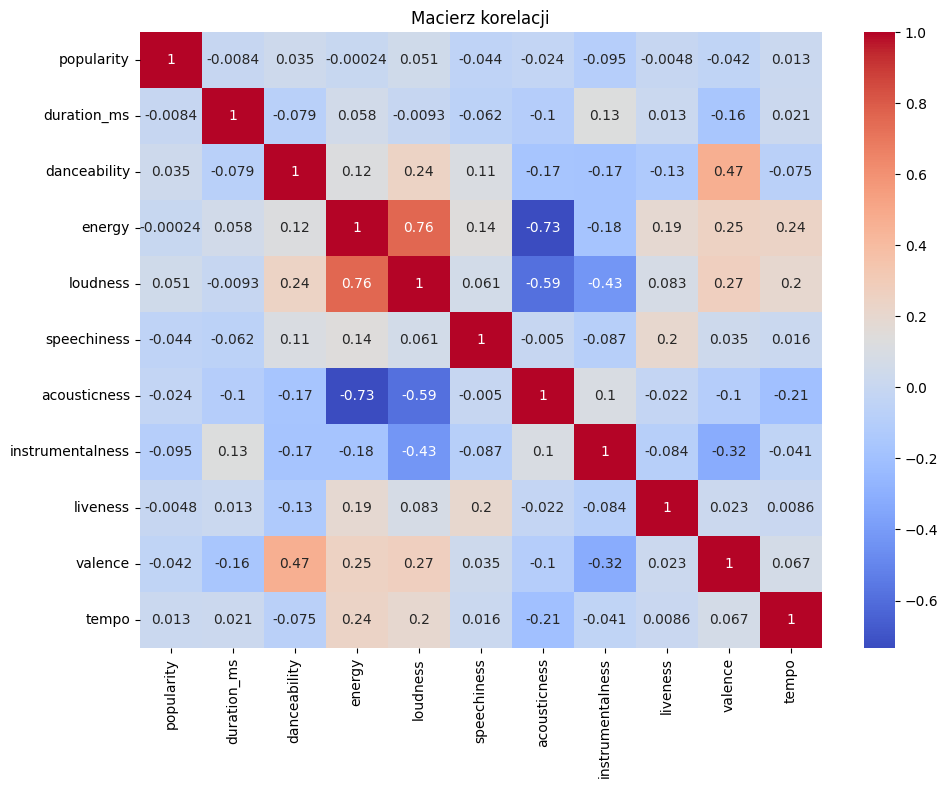

In [99]:
#Macierz korelacji
df_corr = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

plt.figure(figsize=(11, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

**Analiza macierzy korelacji**

Silną korelację ujemną (-0.73) mają zmienne energy i acousticness. Korelacja ta oznacza, że:
*   bardziej energiczne utwory mają zazwyczaj mniejsze prawdopodobieństwo bycia utworami akustycznymi
*   utwory mające większe prawdopodobieństwo bycia utworami akustycznymi są zazwyczaj mniej energiczne

Wyraźną korelację ujemną (-0.59) mają zmienne acousticness i loudness. Korelacja ta oznacza, że:
*   utwory głośniejsze mają z reguły mniejsze prawdopodobieństwo bycia utworami akustycznymi
*   utwory mające większe prawdopodobieństwo bycia utworami akustycznymi są z reguły cichsze

Silną korelację dodatnią (0.76) mają zmienne energy i loudness. Korelacja ta oznacza, że:
*   utwory głośniejsze są zazwyczaj bardziej energiczne
*   utwory cichsze są zazwyczaj mniej energiczne

Umiarkowaną korelację dodatnią (0.47) mają zmienne danceability i valence. Korelacja ta oznacza, że:
*   utwory bardziej pozytywne są zwykle lepsze do tańczenia
*   utwory bardziej negatywne są zwykle gorsze do tańczenia

###**Wartości odstające**

Aby zbadać wartości odstające, zastosujemy boxploty. Będziemy badać zmienne liczbowe: popularity, duration_ms, danceability, energy, loudness, speechiness, acousticness, liveness, valence i tempo.

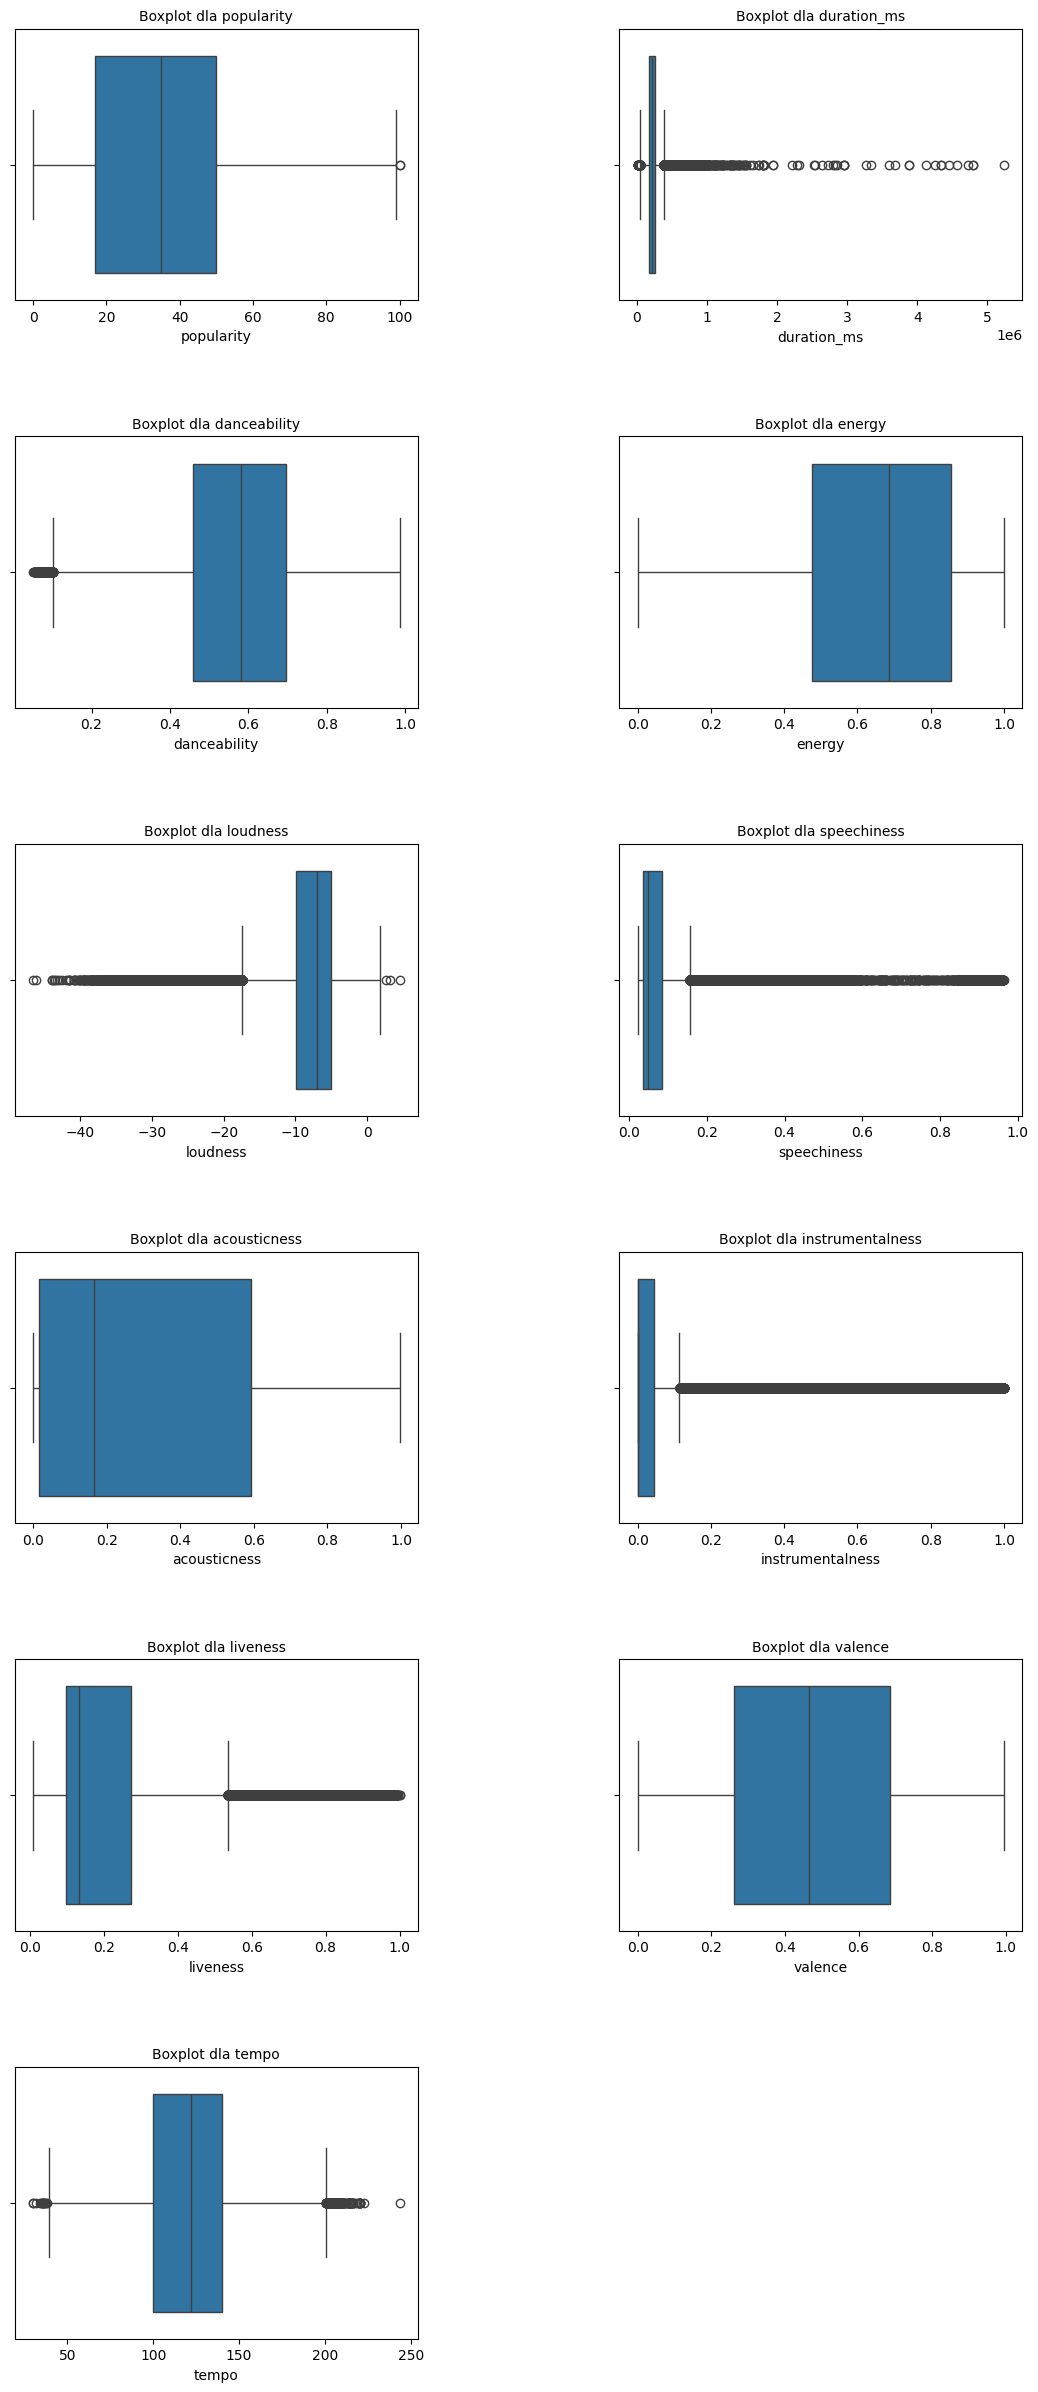

In [100]:
features = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

n_rows = 6
n_cols = 2

plt.figure(figsize=(13, 30))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot dla {col}', fontsize=10)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Boxploty pokazują, że spora część badanych zmiennych ma wartości odstające. Warto jednak zauważyć, że utwory zawarte w zbiorze są różnorodne gatunkowo. Wykropkowane wartości na boxplotach wcale nie muszą być wartościami odstającymi. Mogą one na przykład opisywać utwory z niszowych gatunków. Takie utwory mogą mieć skrajne wartości, które są identyfikowane jako odstające, ale w rzeczywistości mogą być typowe dla danego gatunku. Mogą to również być nietypowe utwory, które wciąż wnoszą sporo informacji.


Pogrupujmy utwory według gatunków i dla każdego gatunku przeanalizujmy boxploty zmiennych liczbowych.

In [101]:
# Lista gatunków
genres = df["track_genre"].unique()

n_rows = 3
cols = 2

num_groups = 6
split_genres = [genres[i::num_groups] for i in range(num_groups)]

####**popularity**

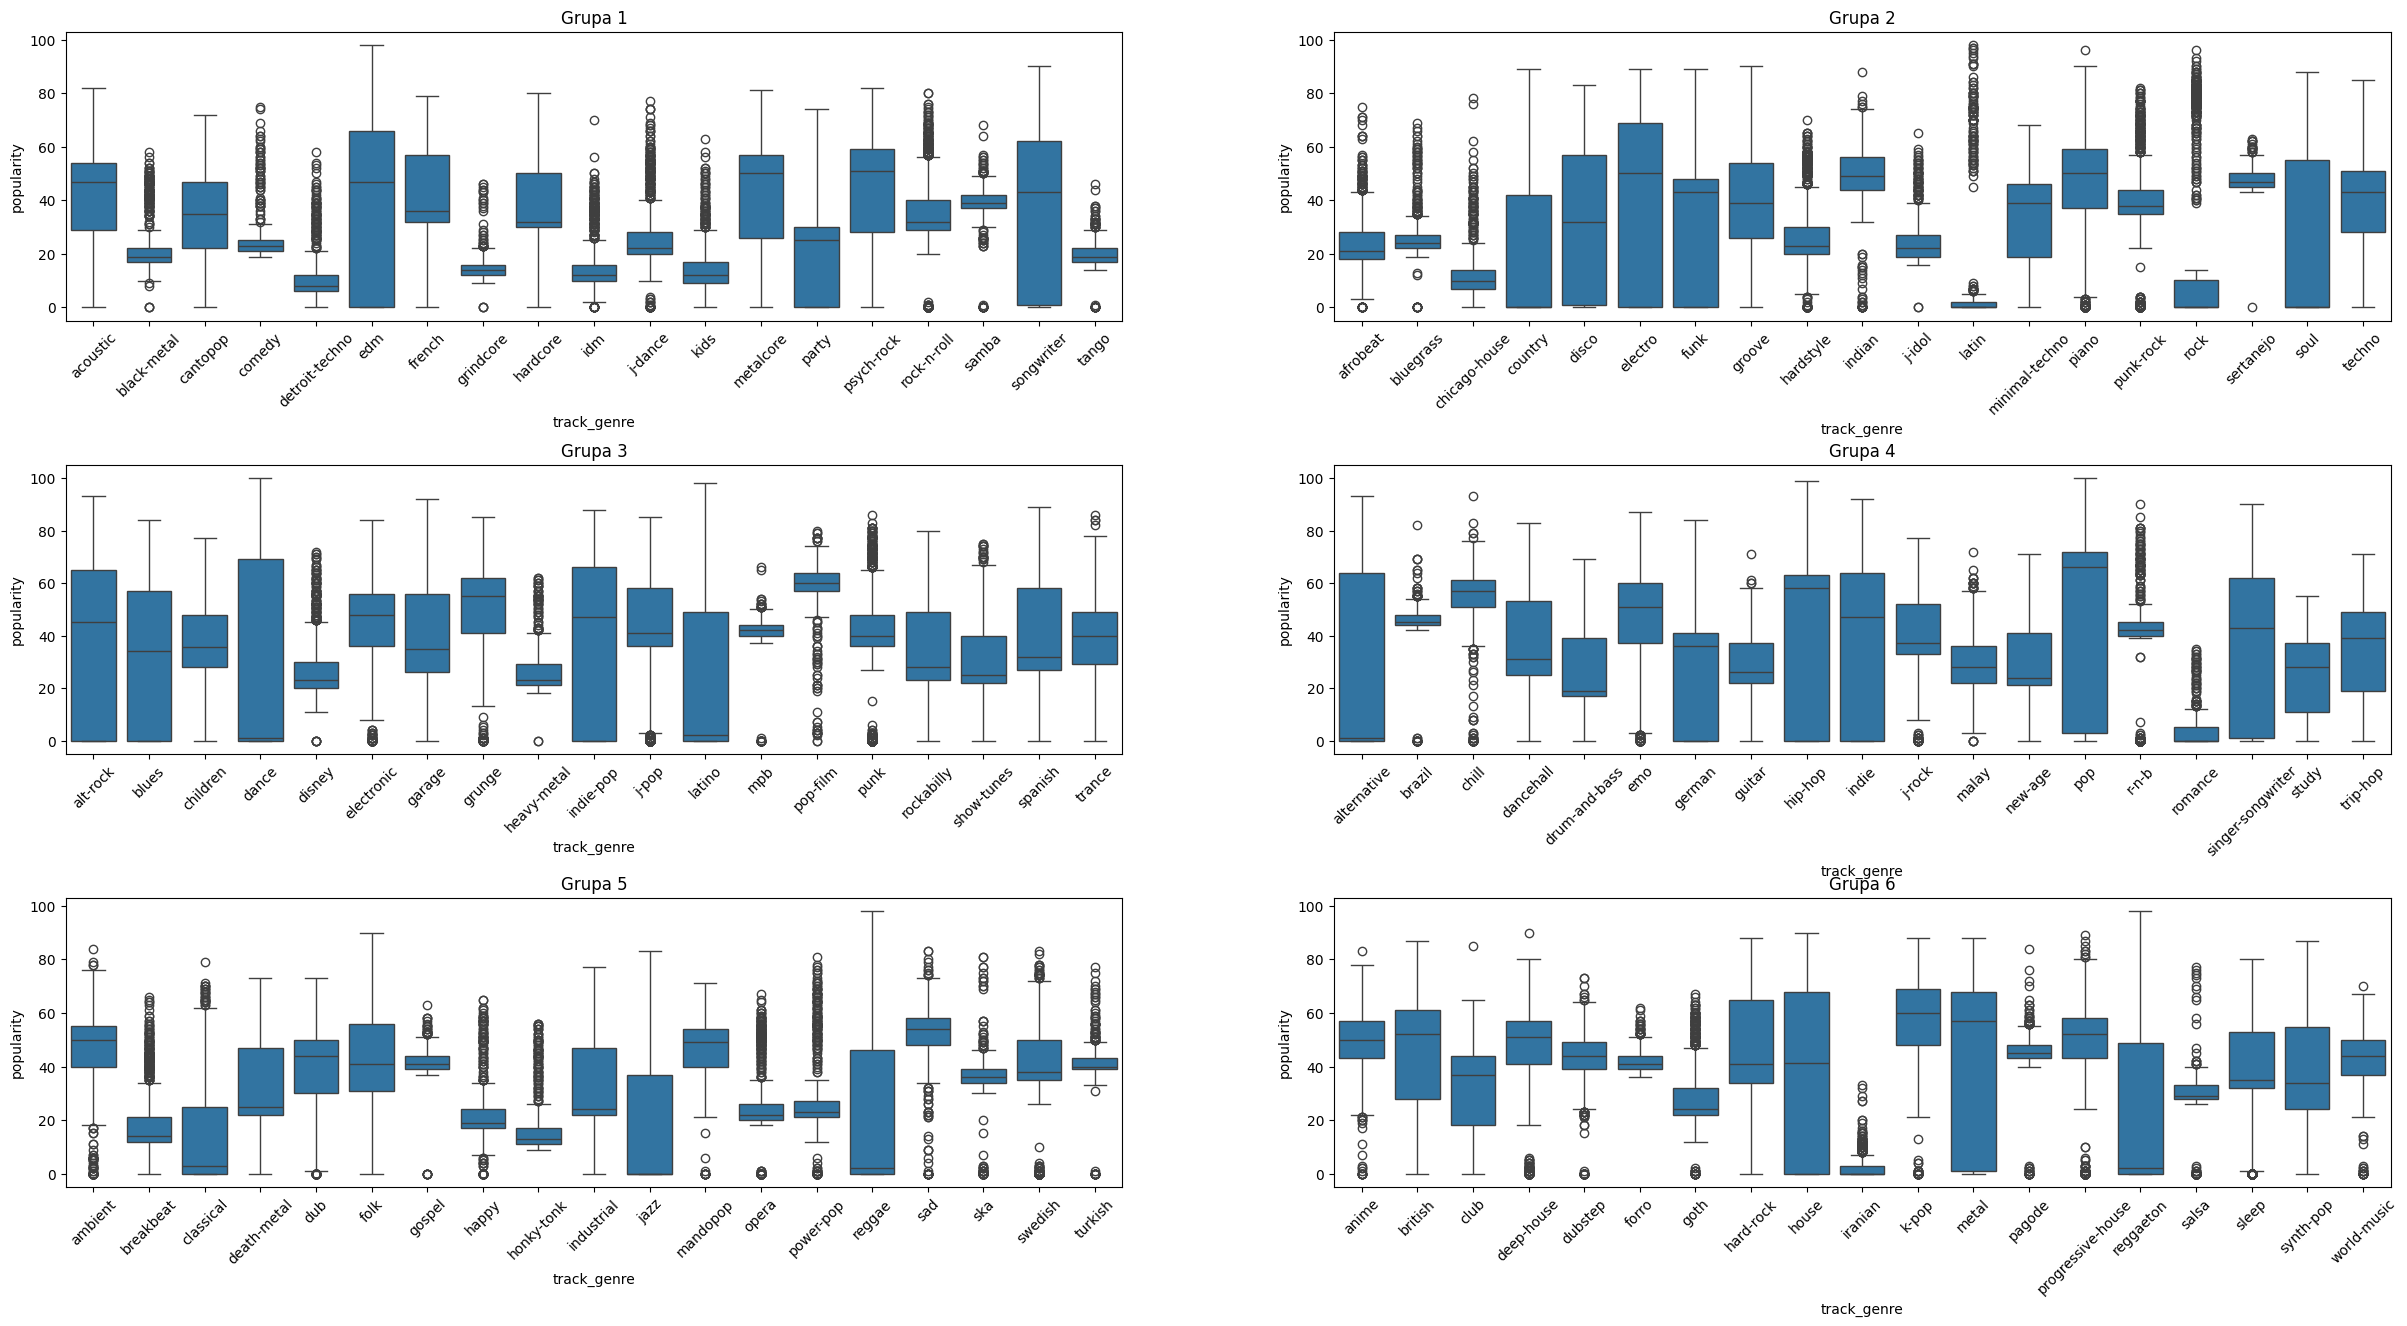

In [102]:
selected_column = 'popularity'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**duration_ms**

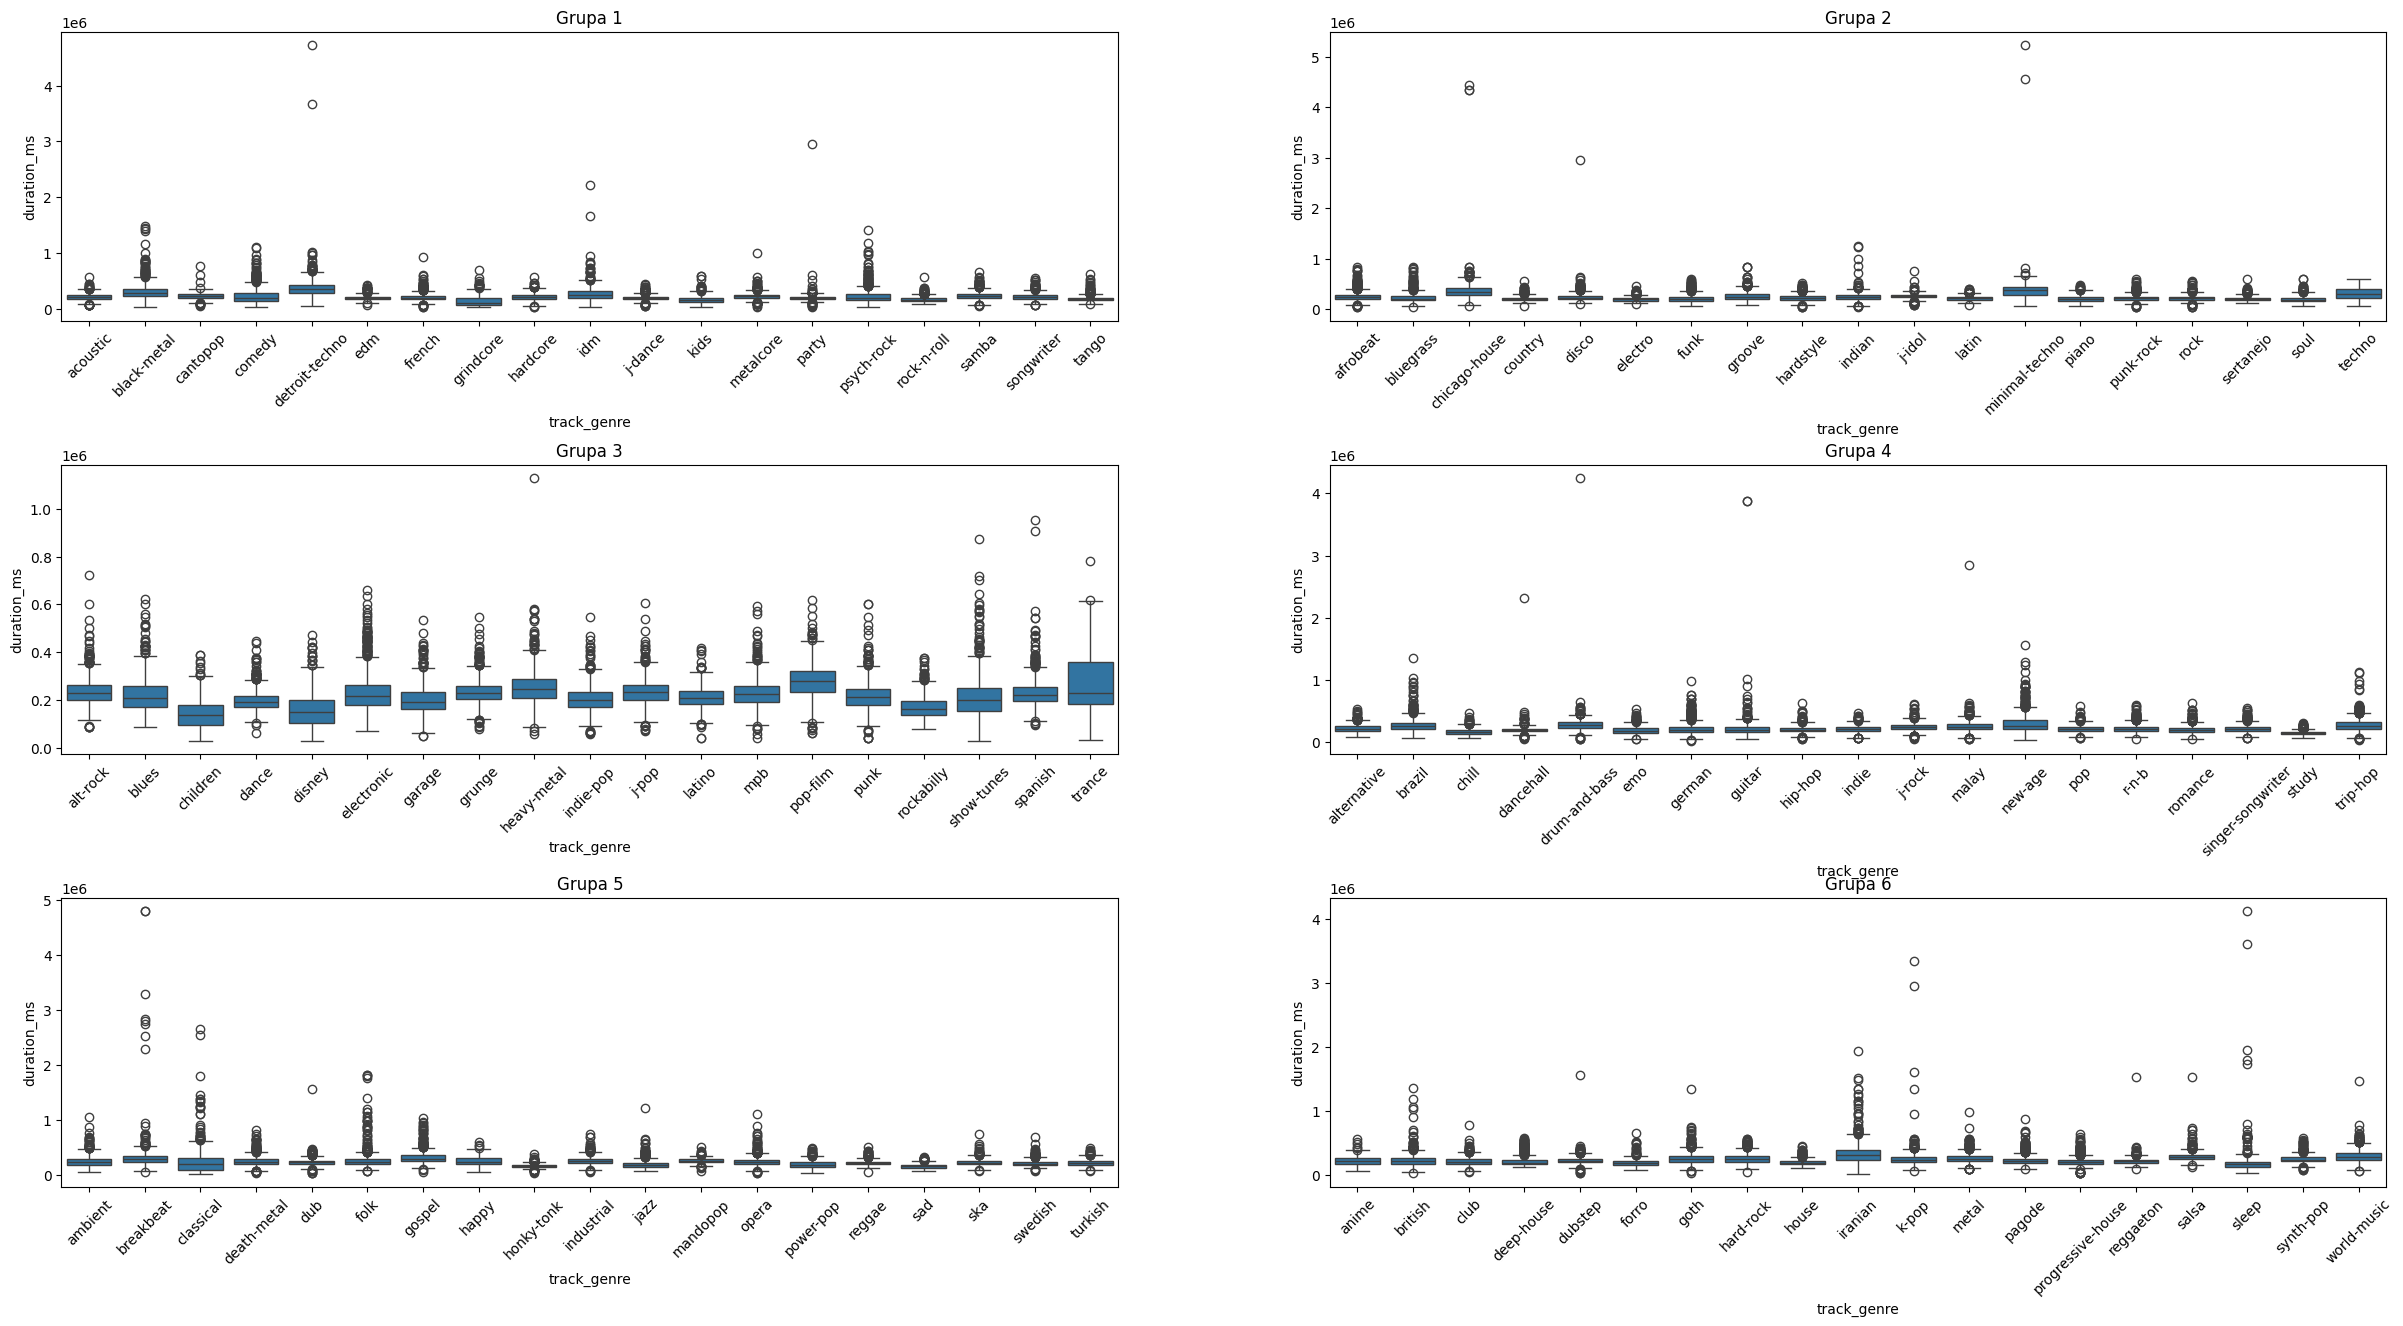

In [103]:
selected_column = 'duration_ms'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**tempo**

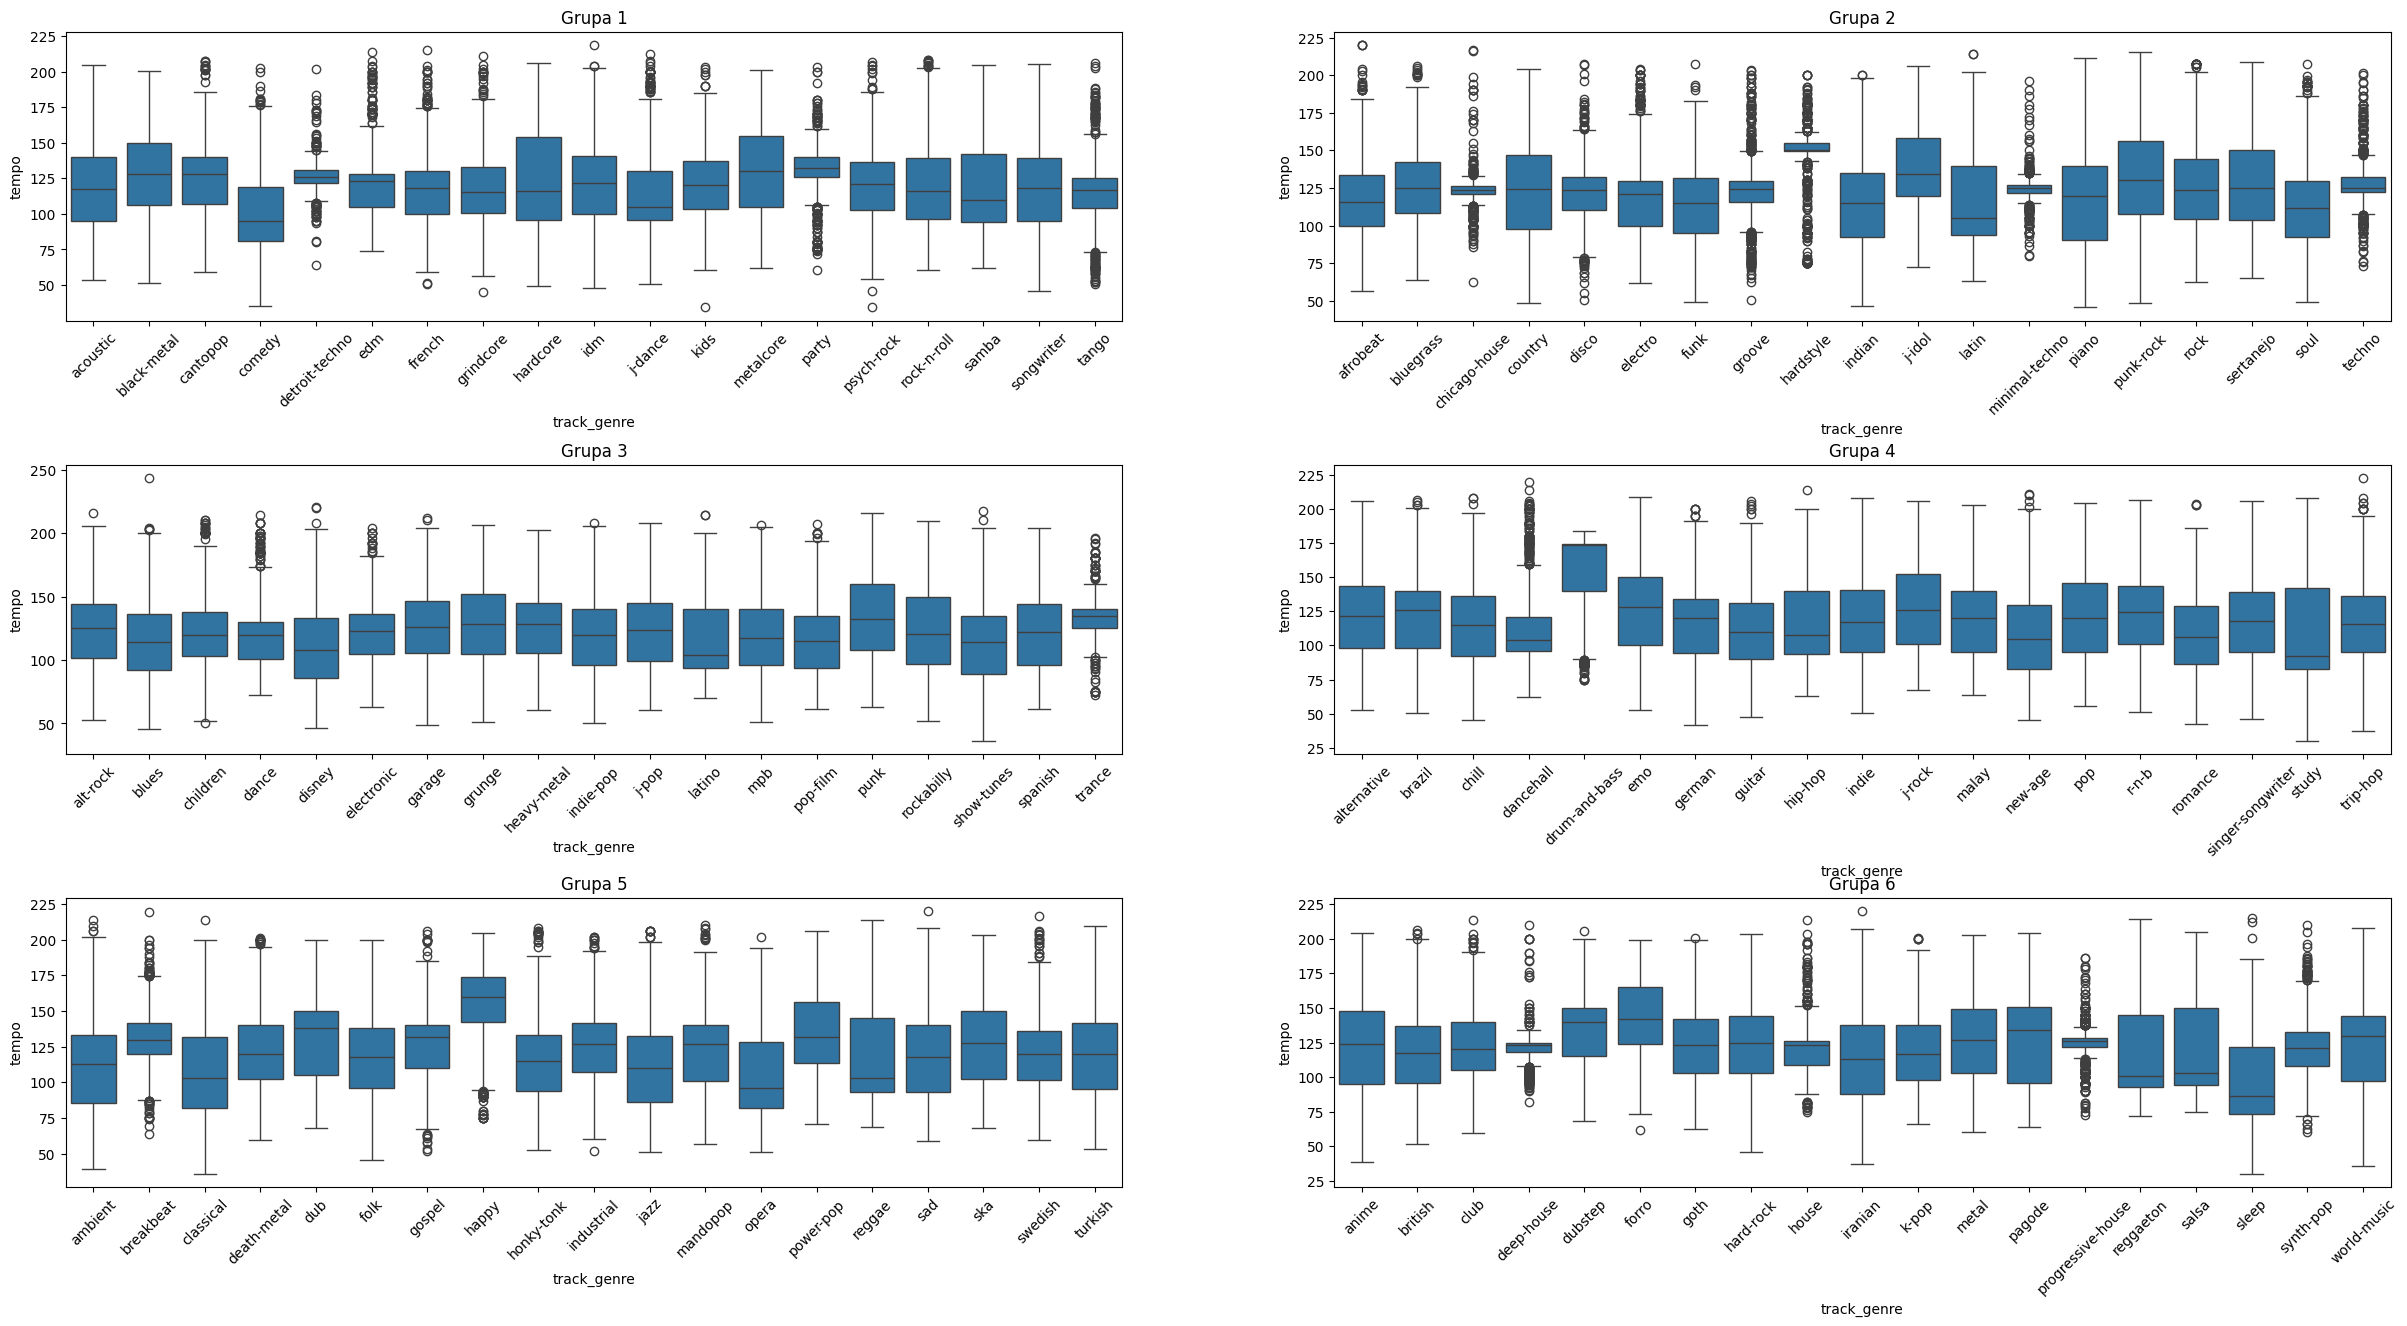

In [104]:
selected_column = 'tempo'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**danceability**

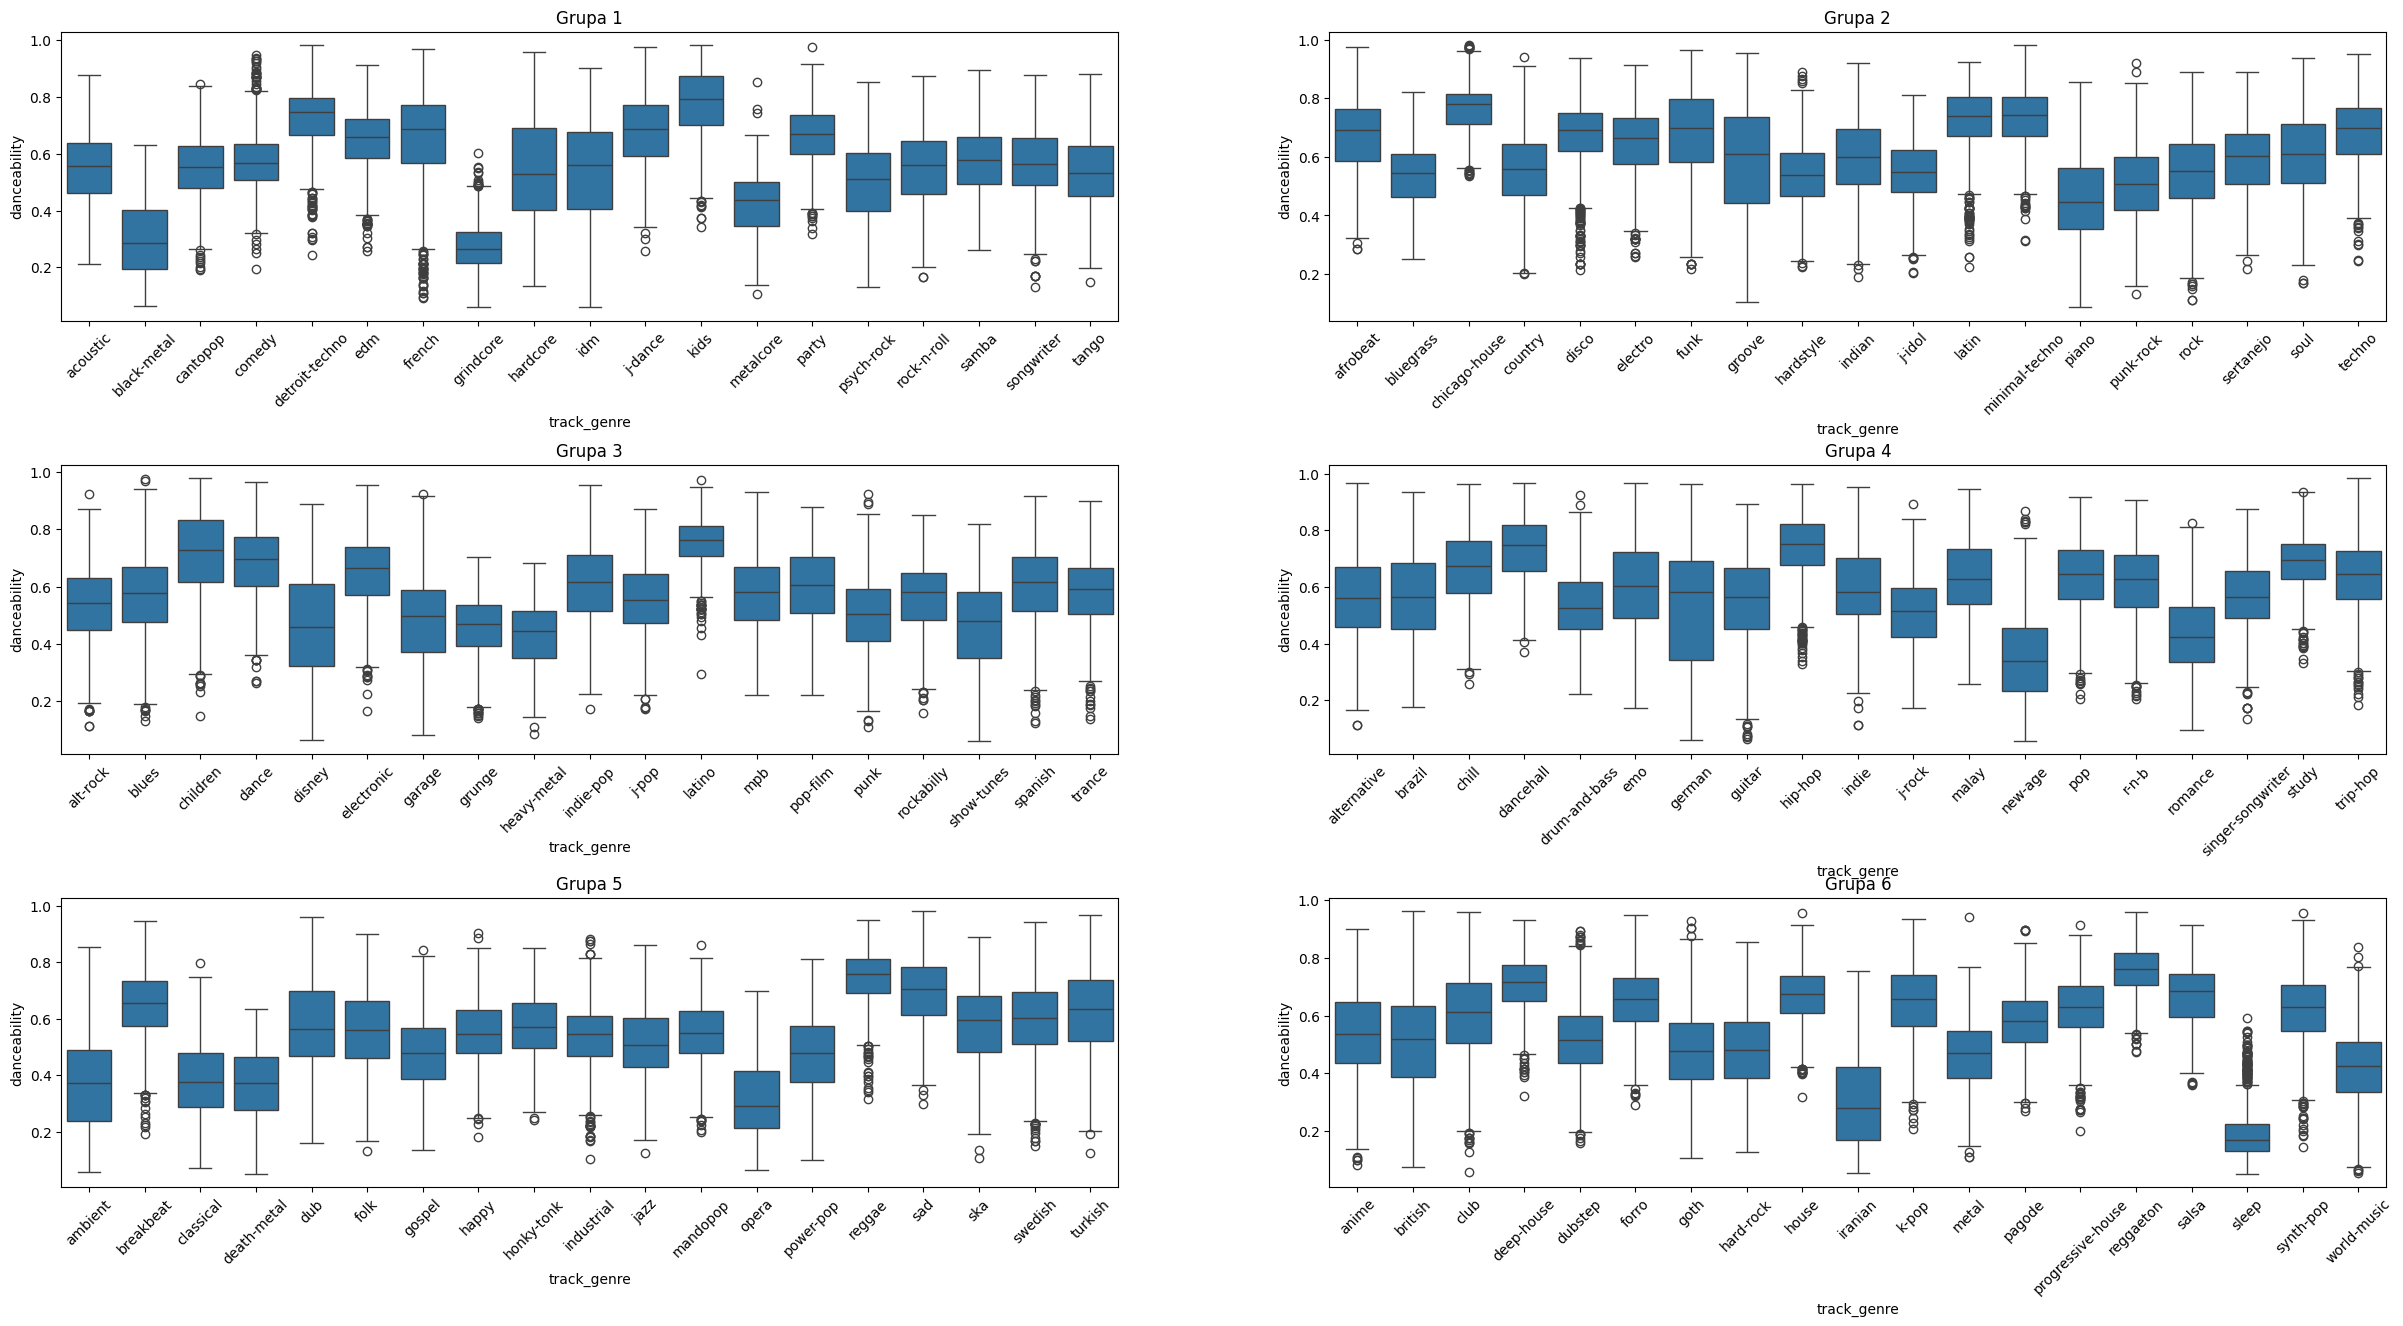

In [105]:
selected_column = 'danceability'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**energy**

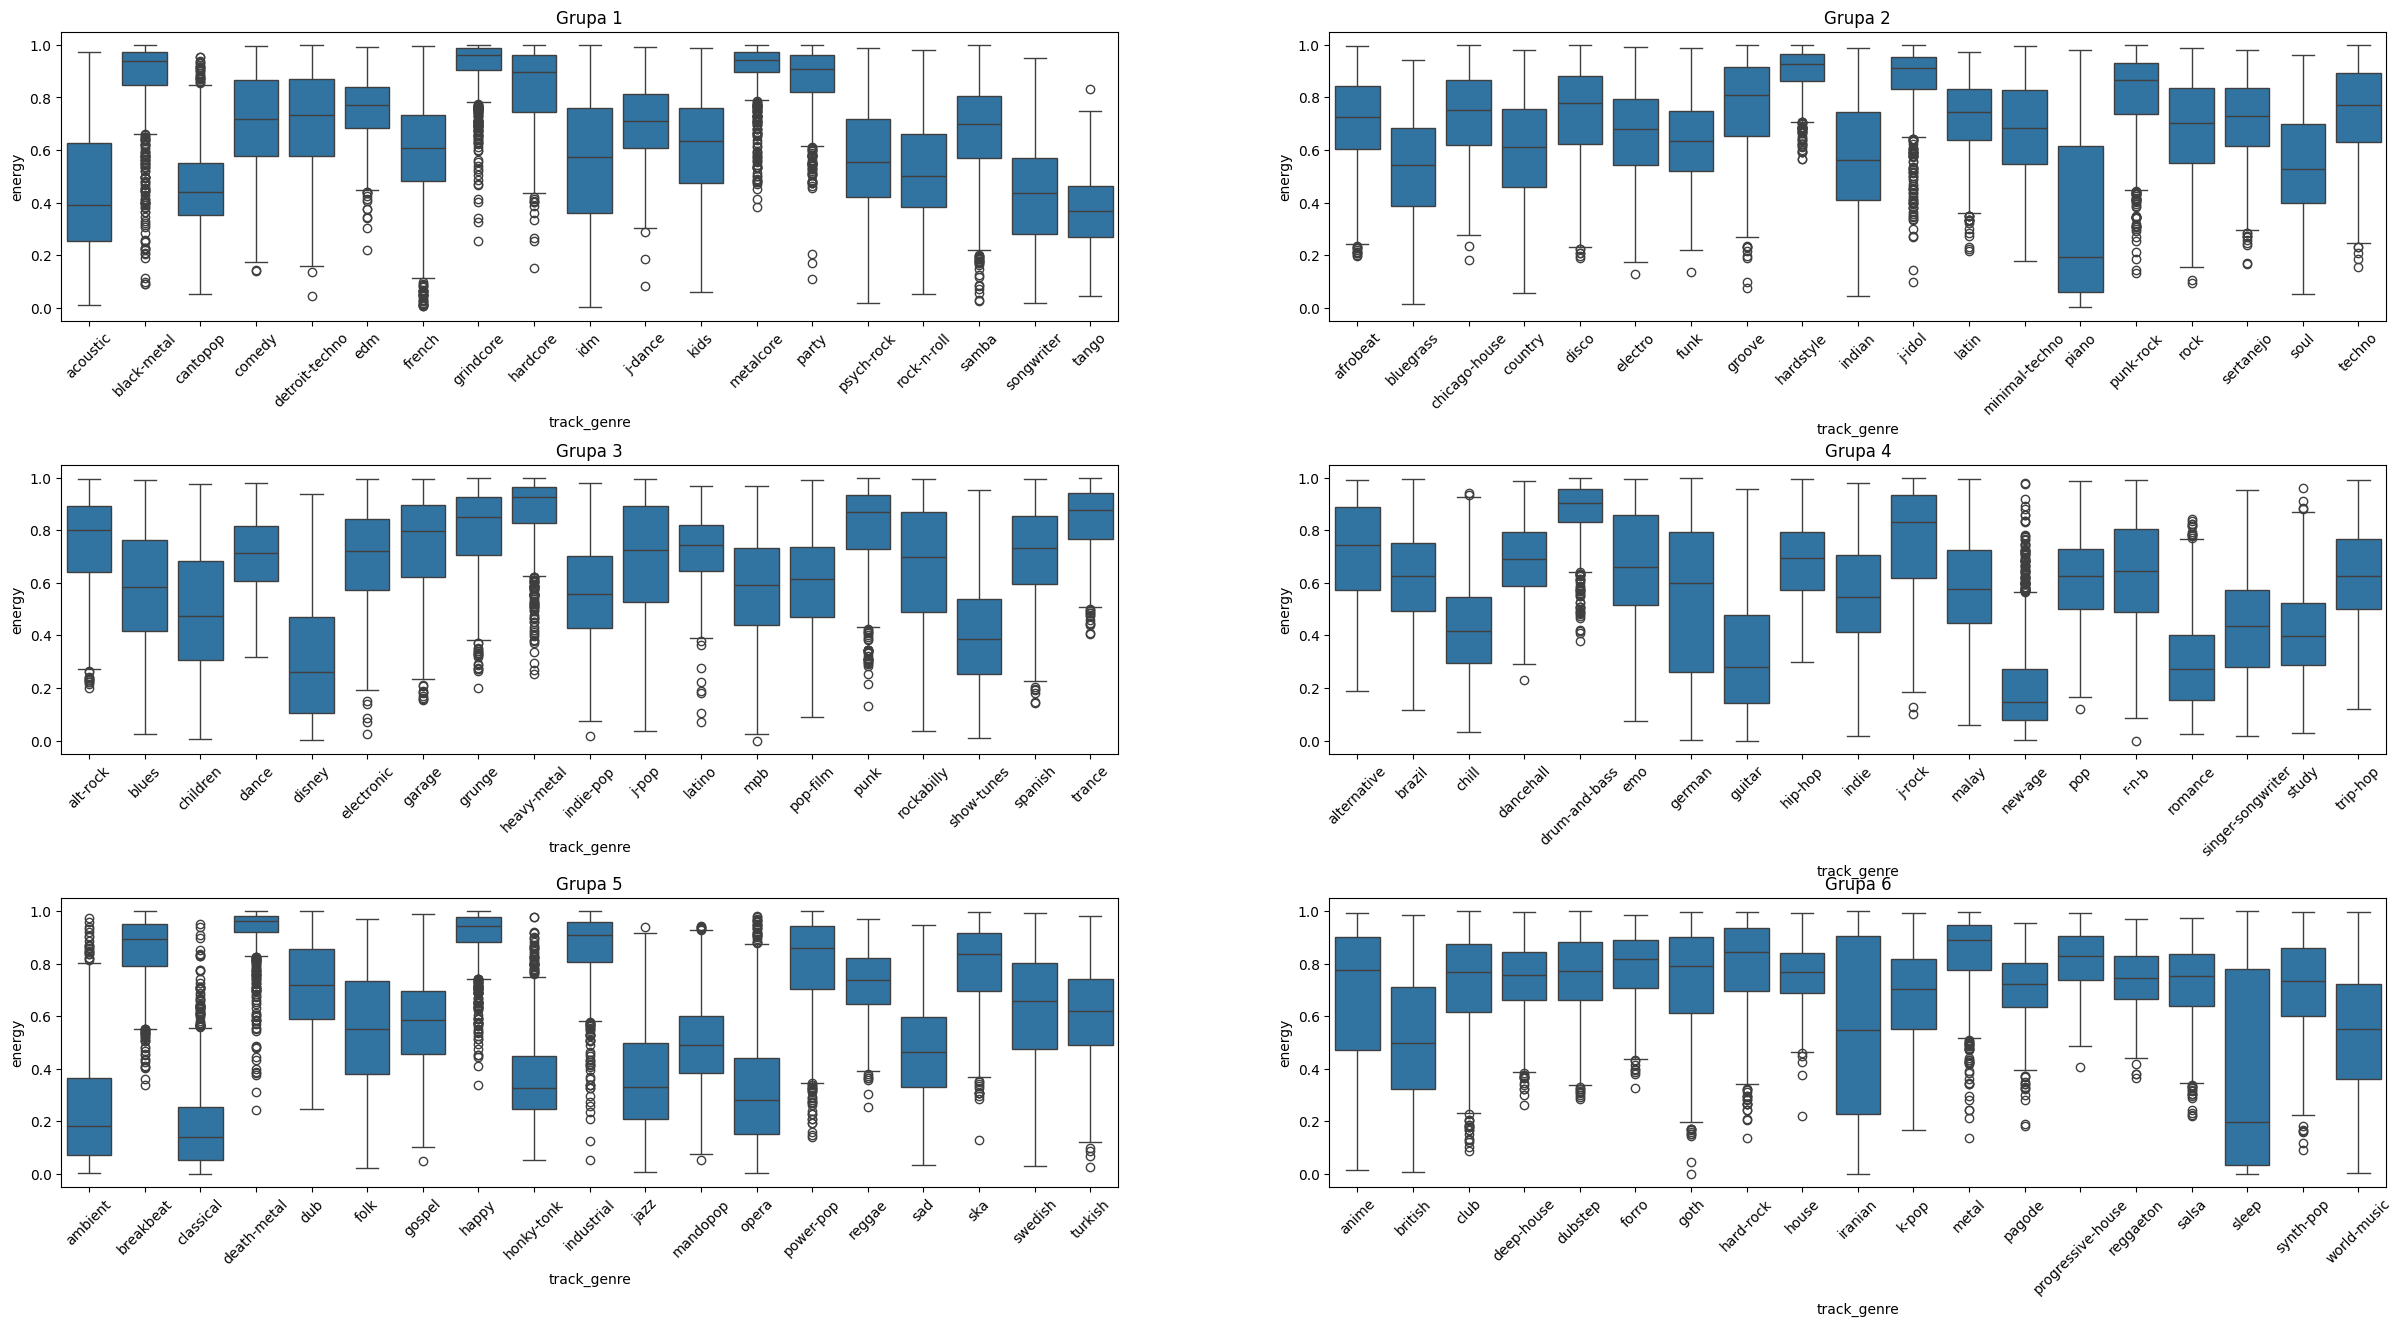

In [106]:
selected_column = 'energy'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**loudness**

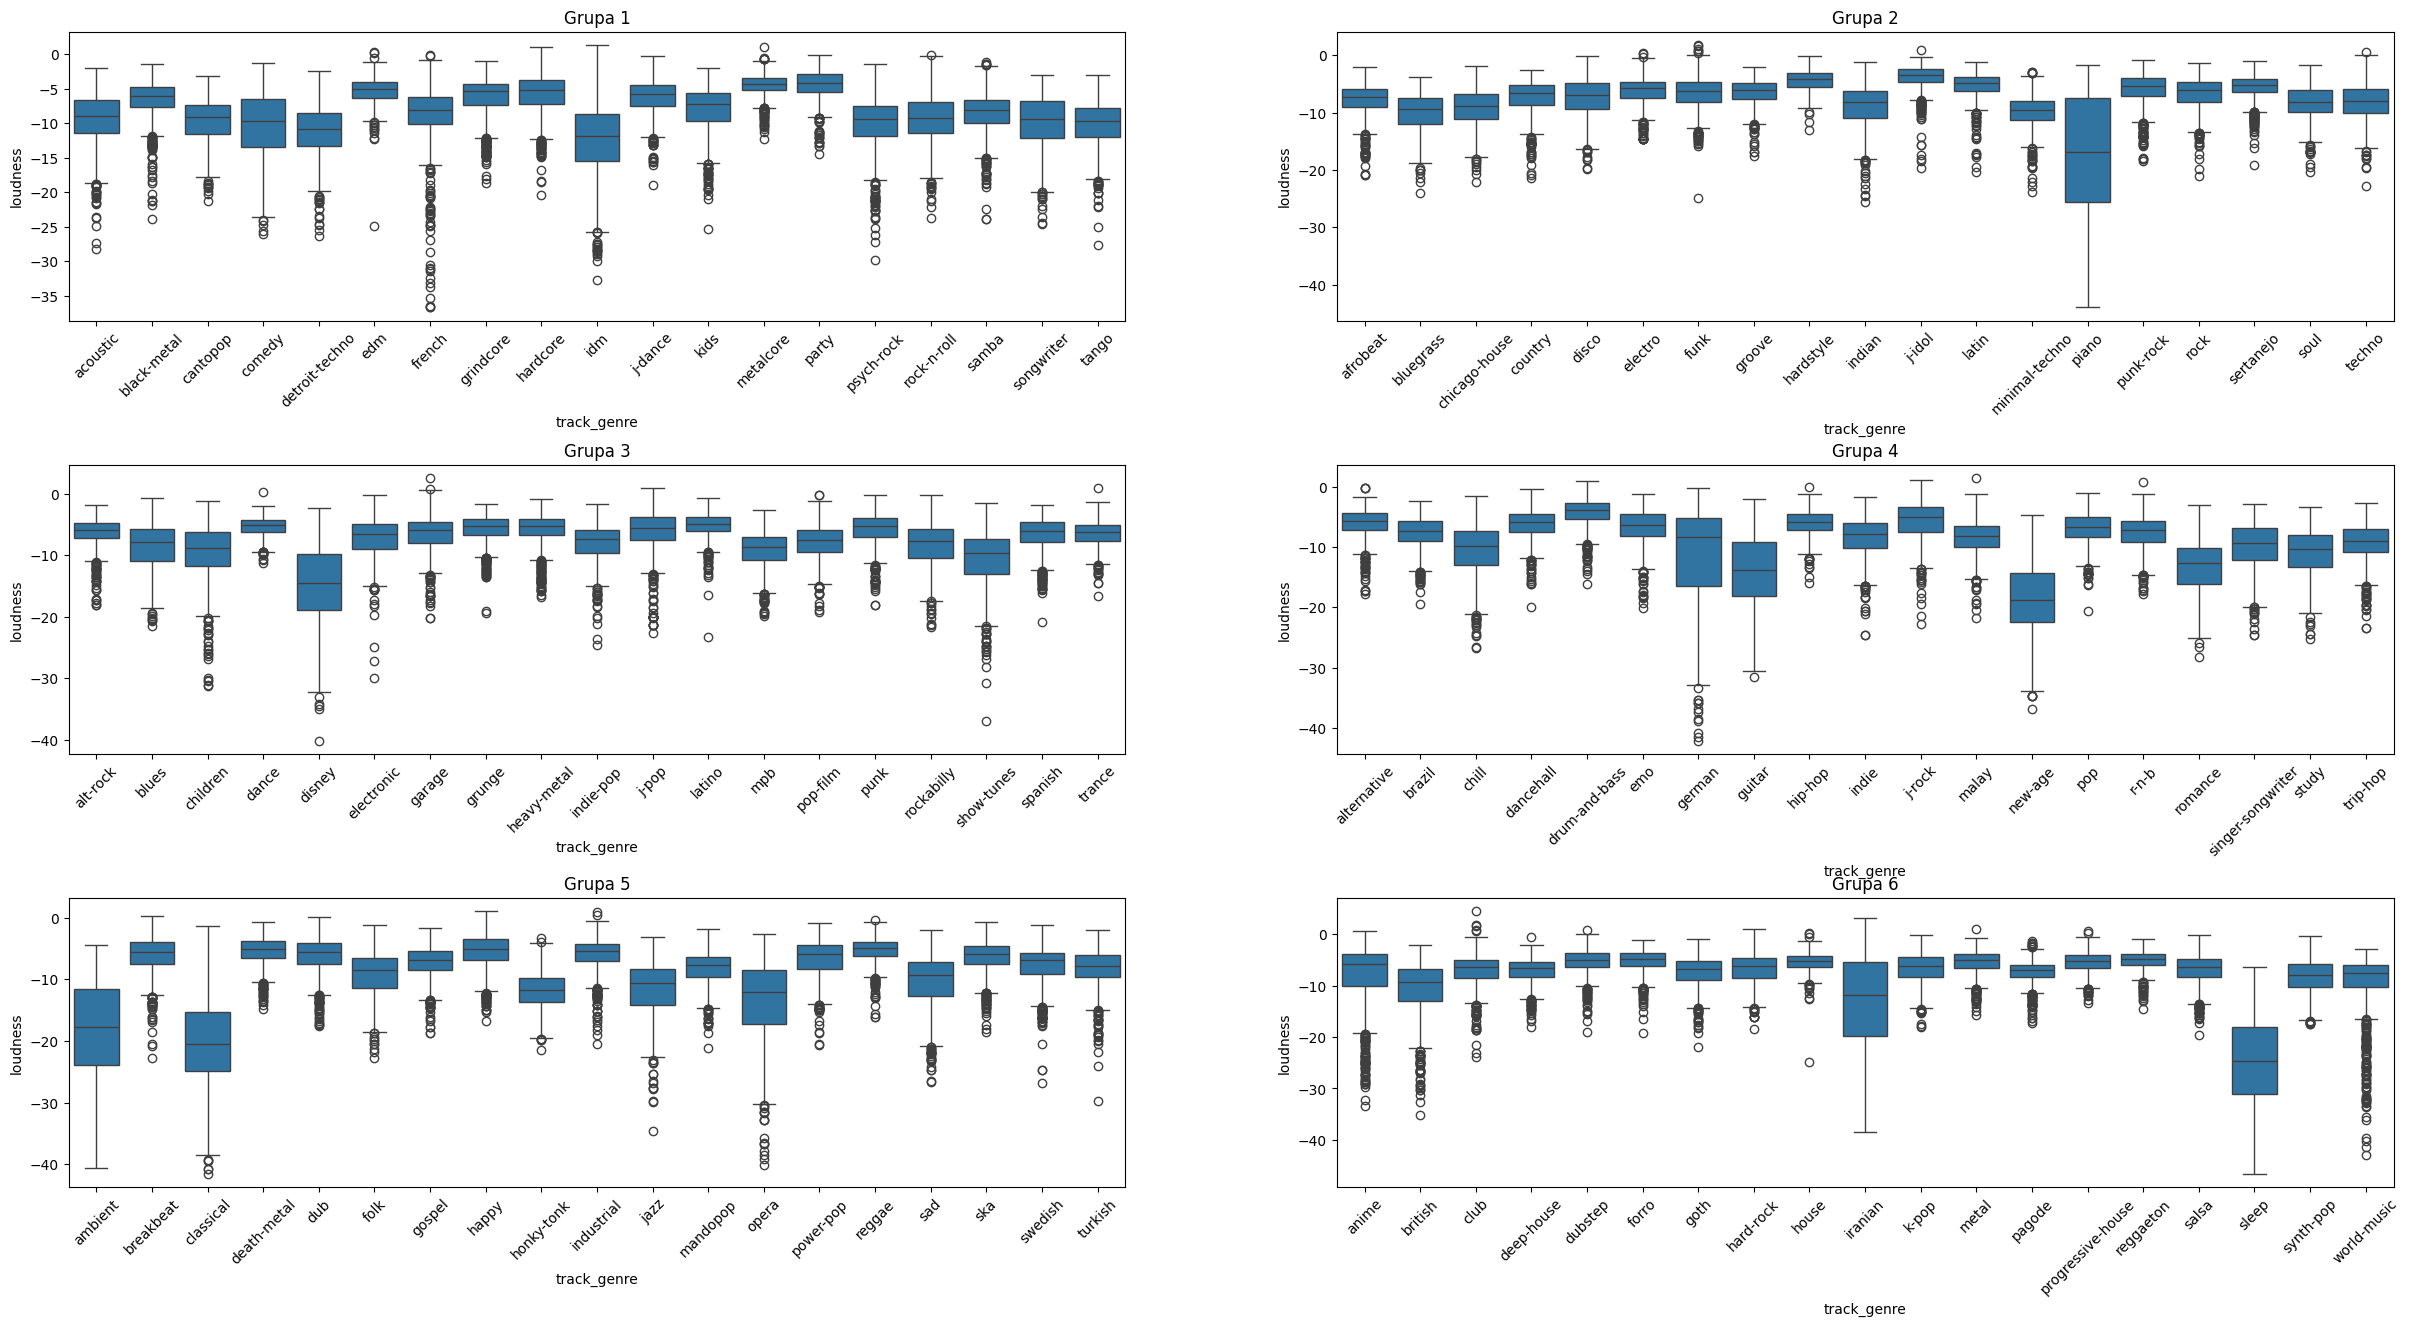

In [107]:
selected_column = 'loudness'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**speechiness**

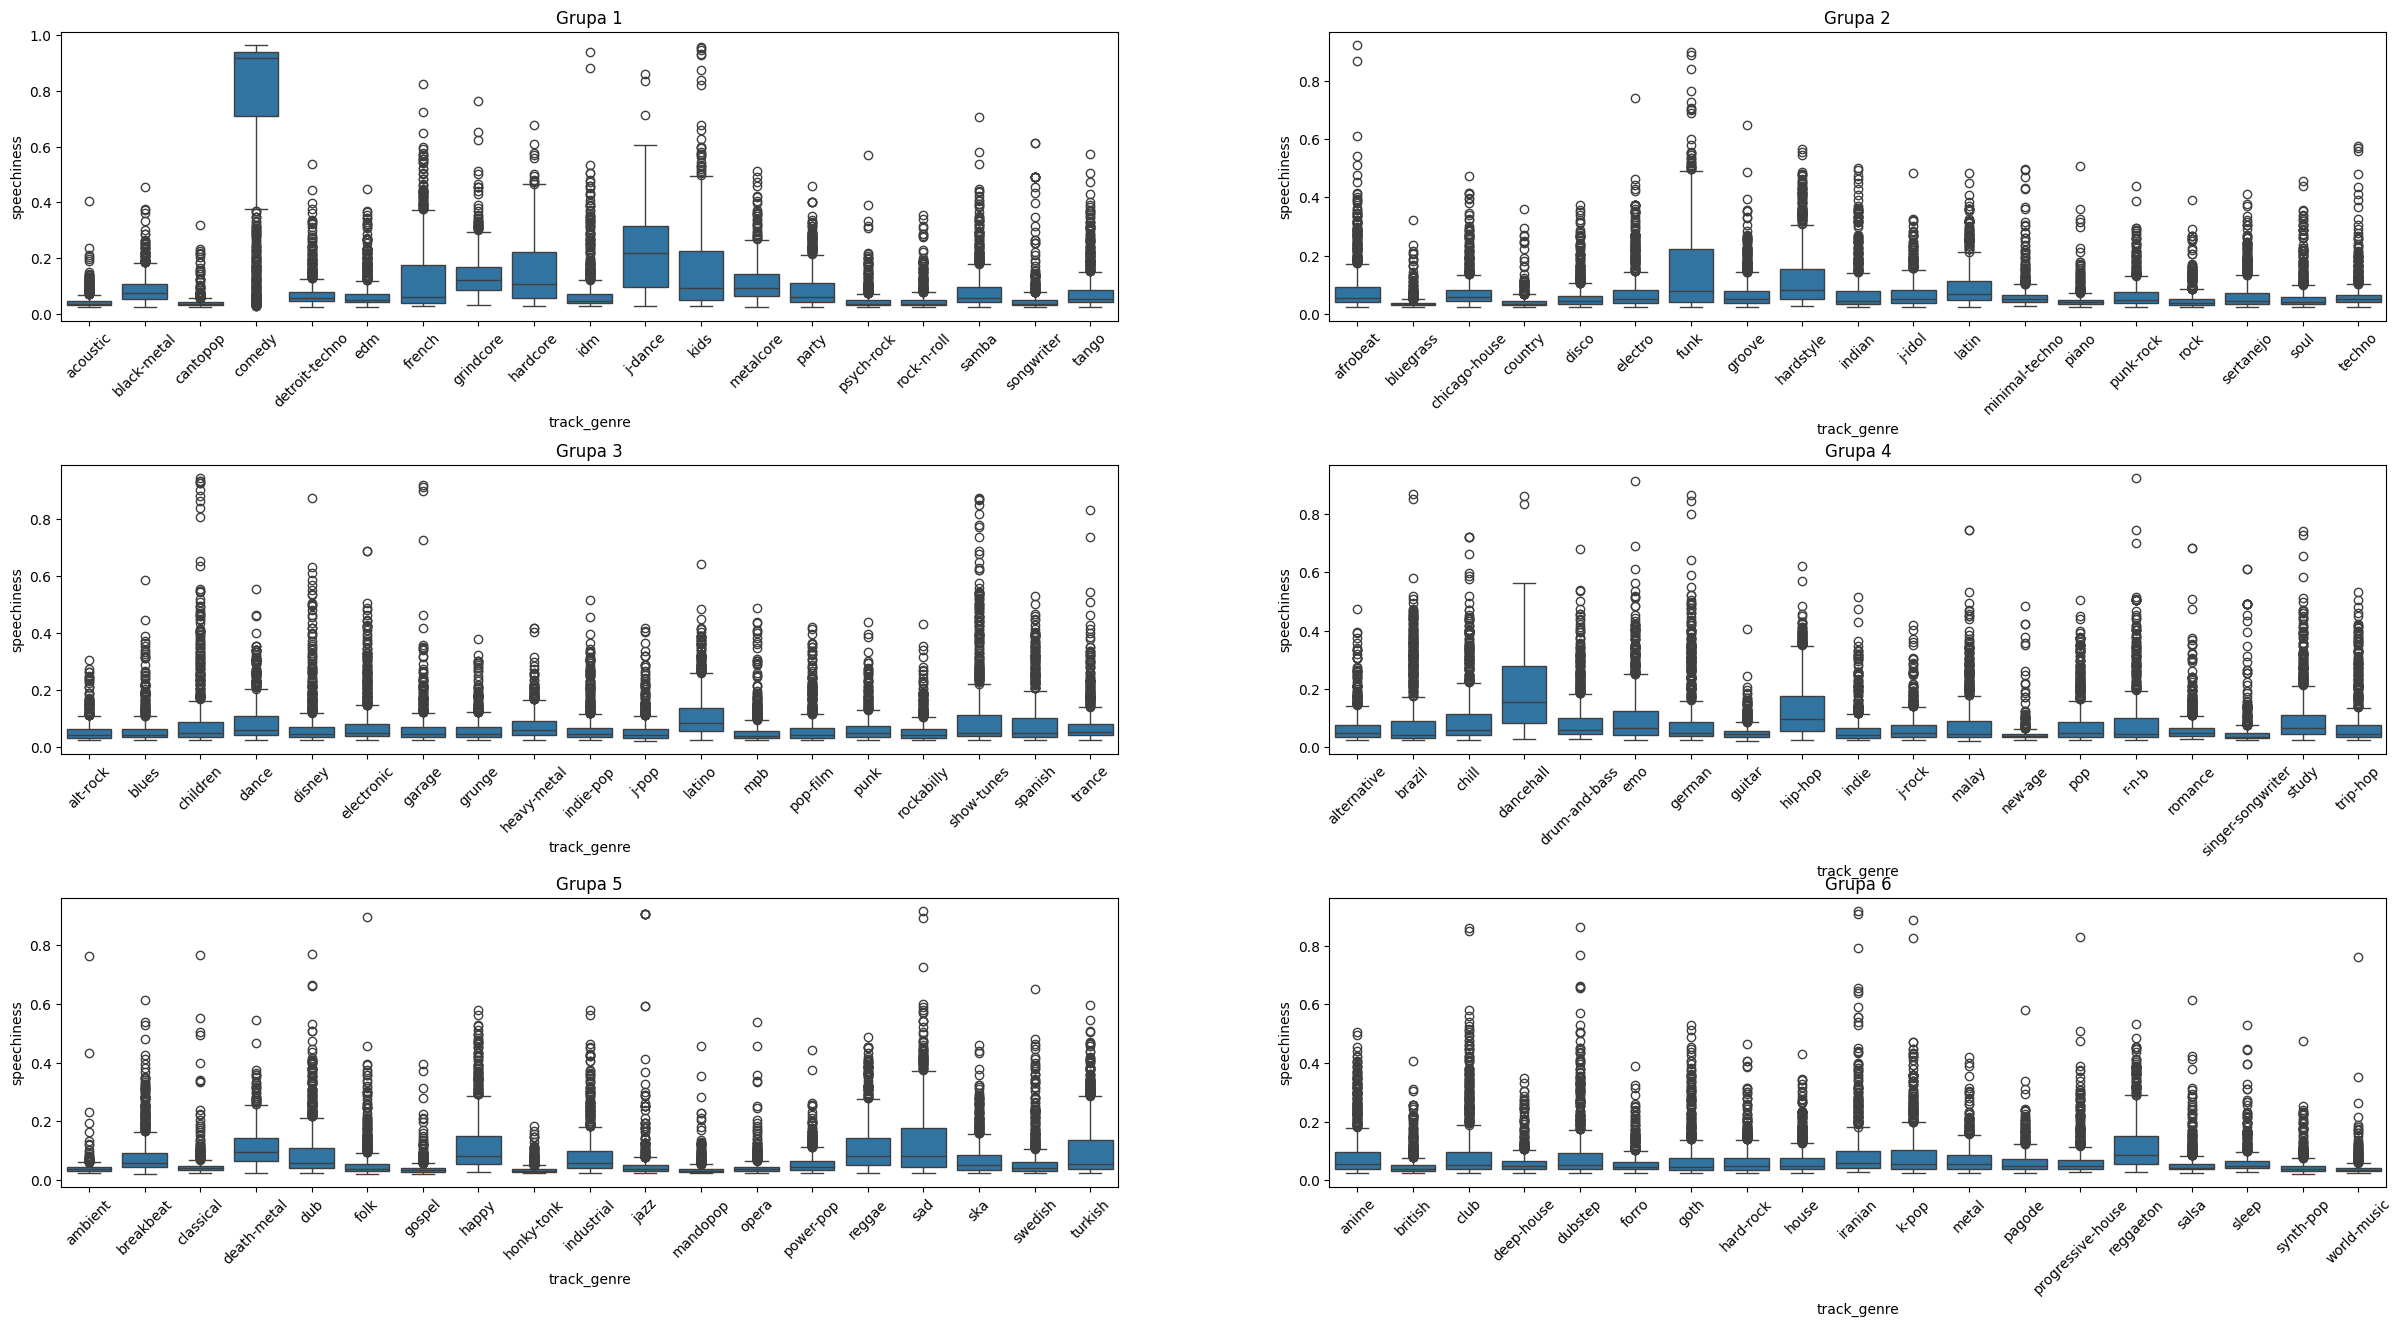

In [108]:
selected_column = 'speechiness'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**acousticness**

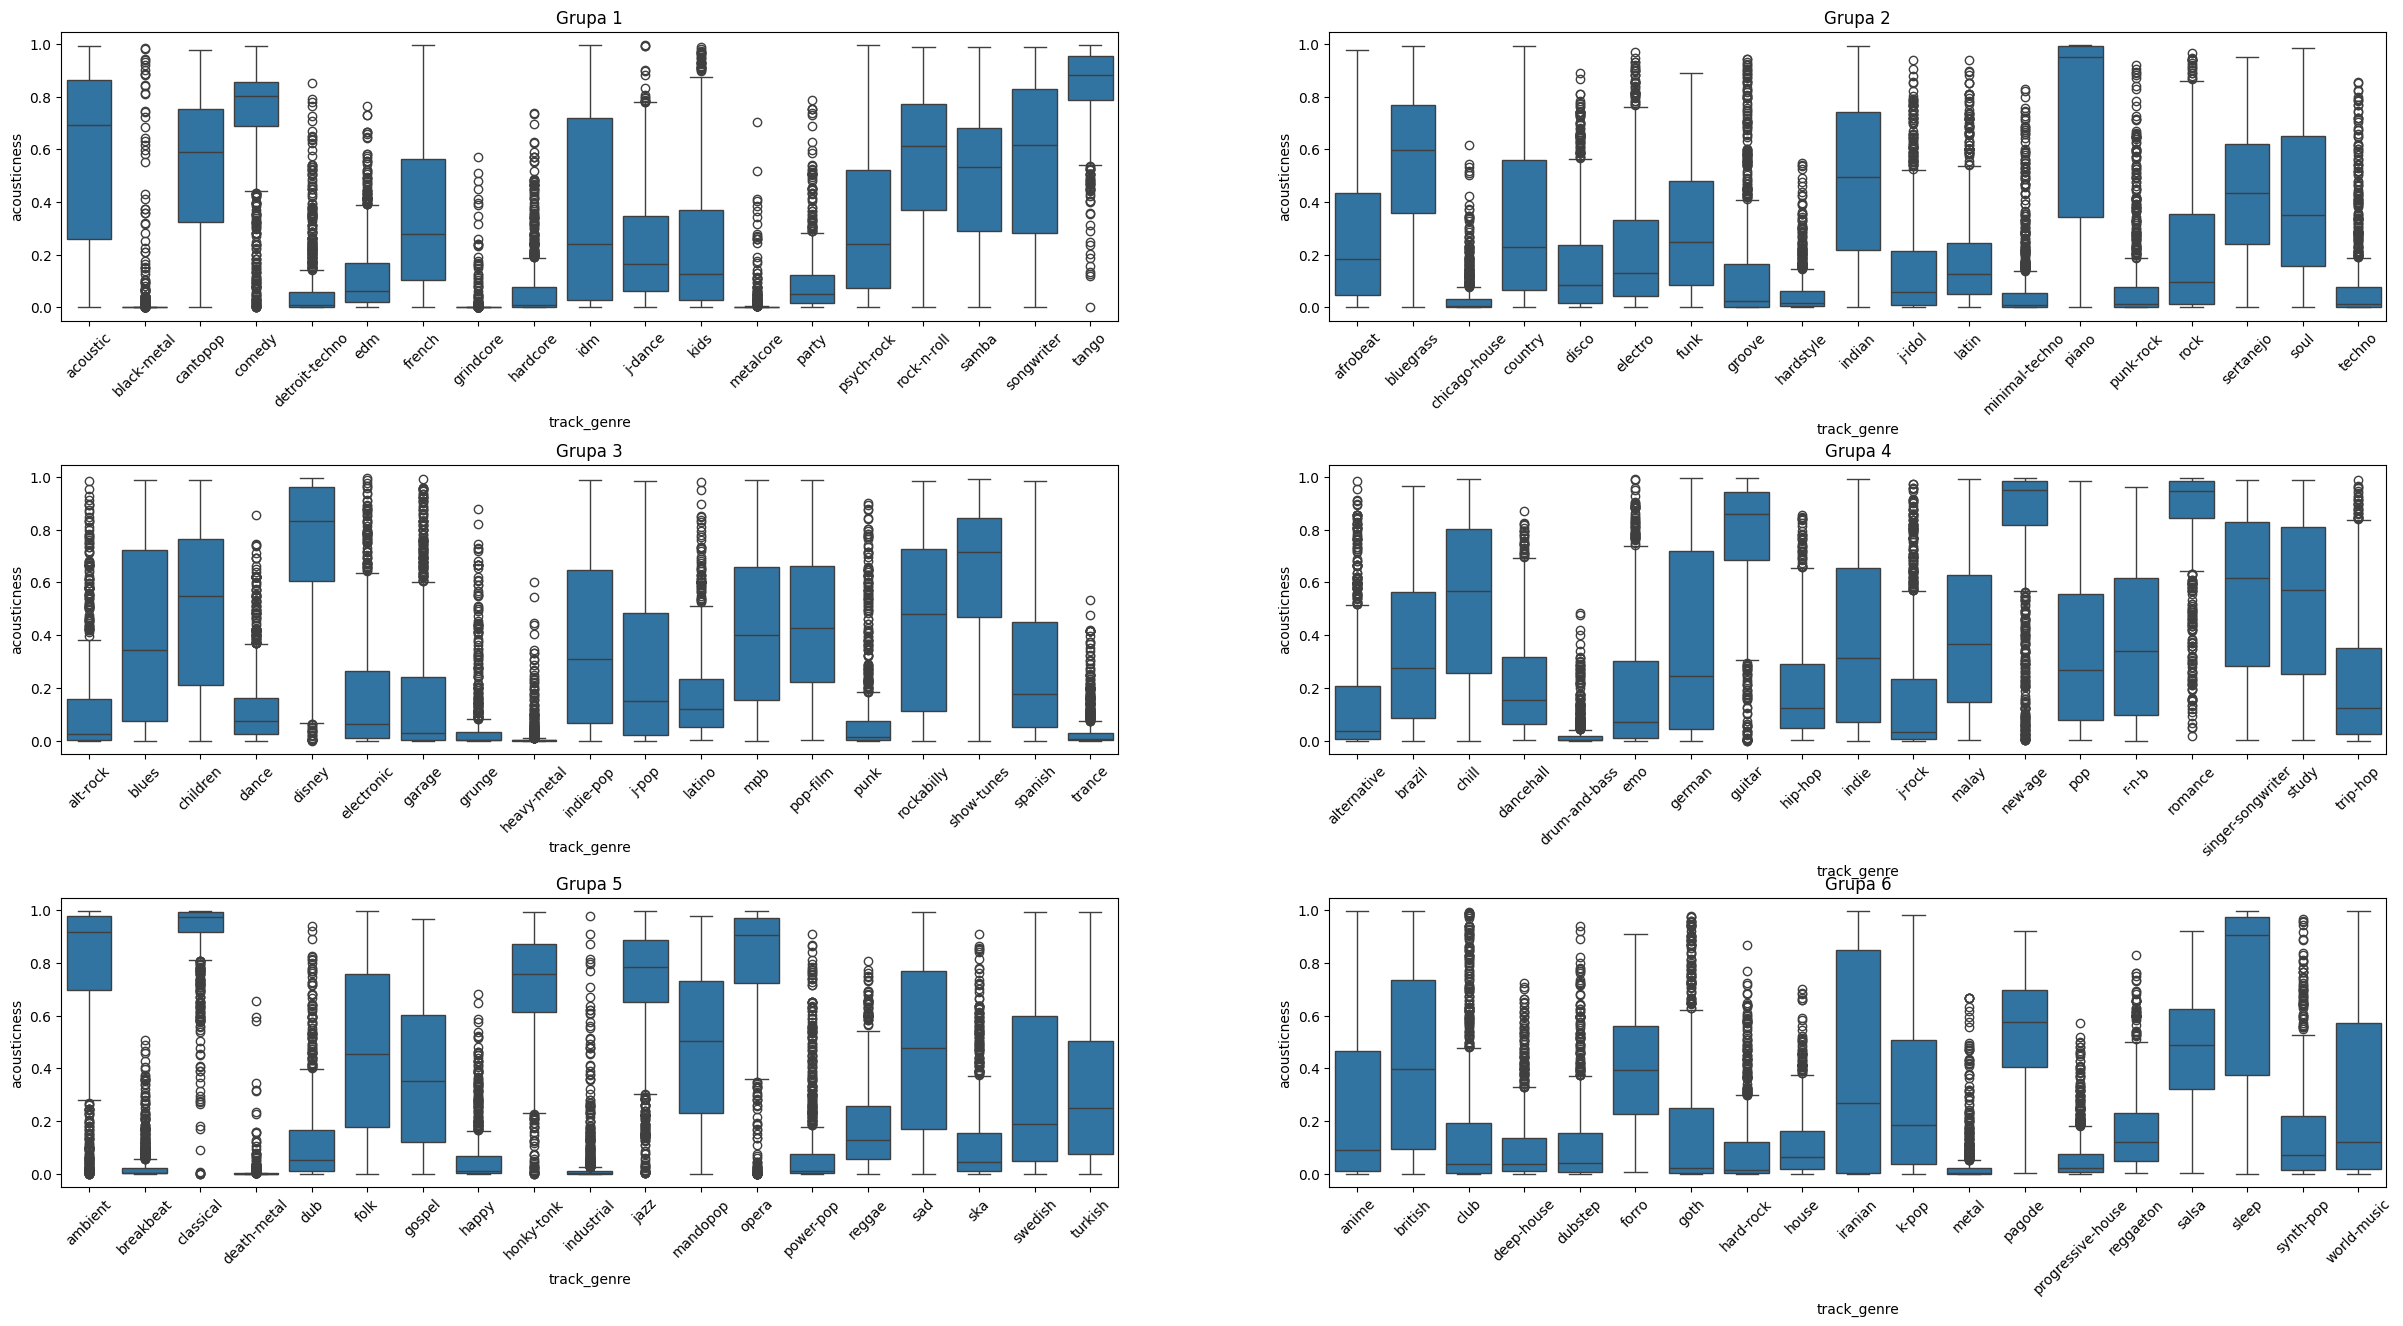

In [109]:
selected_column = 'acousticness'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**instrumentalness**

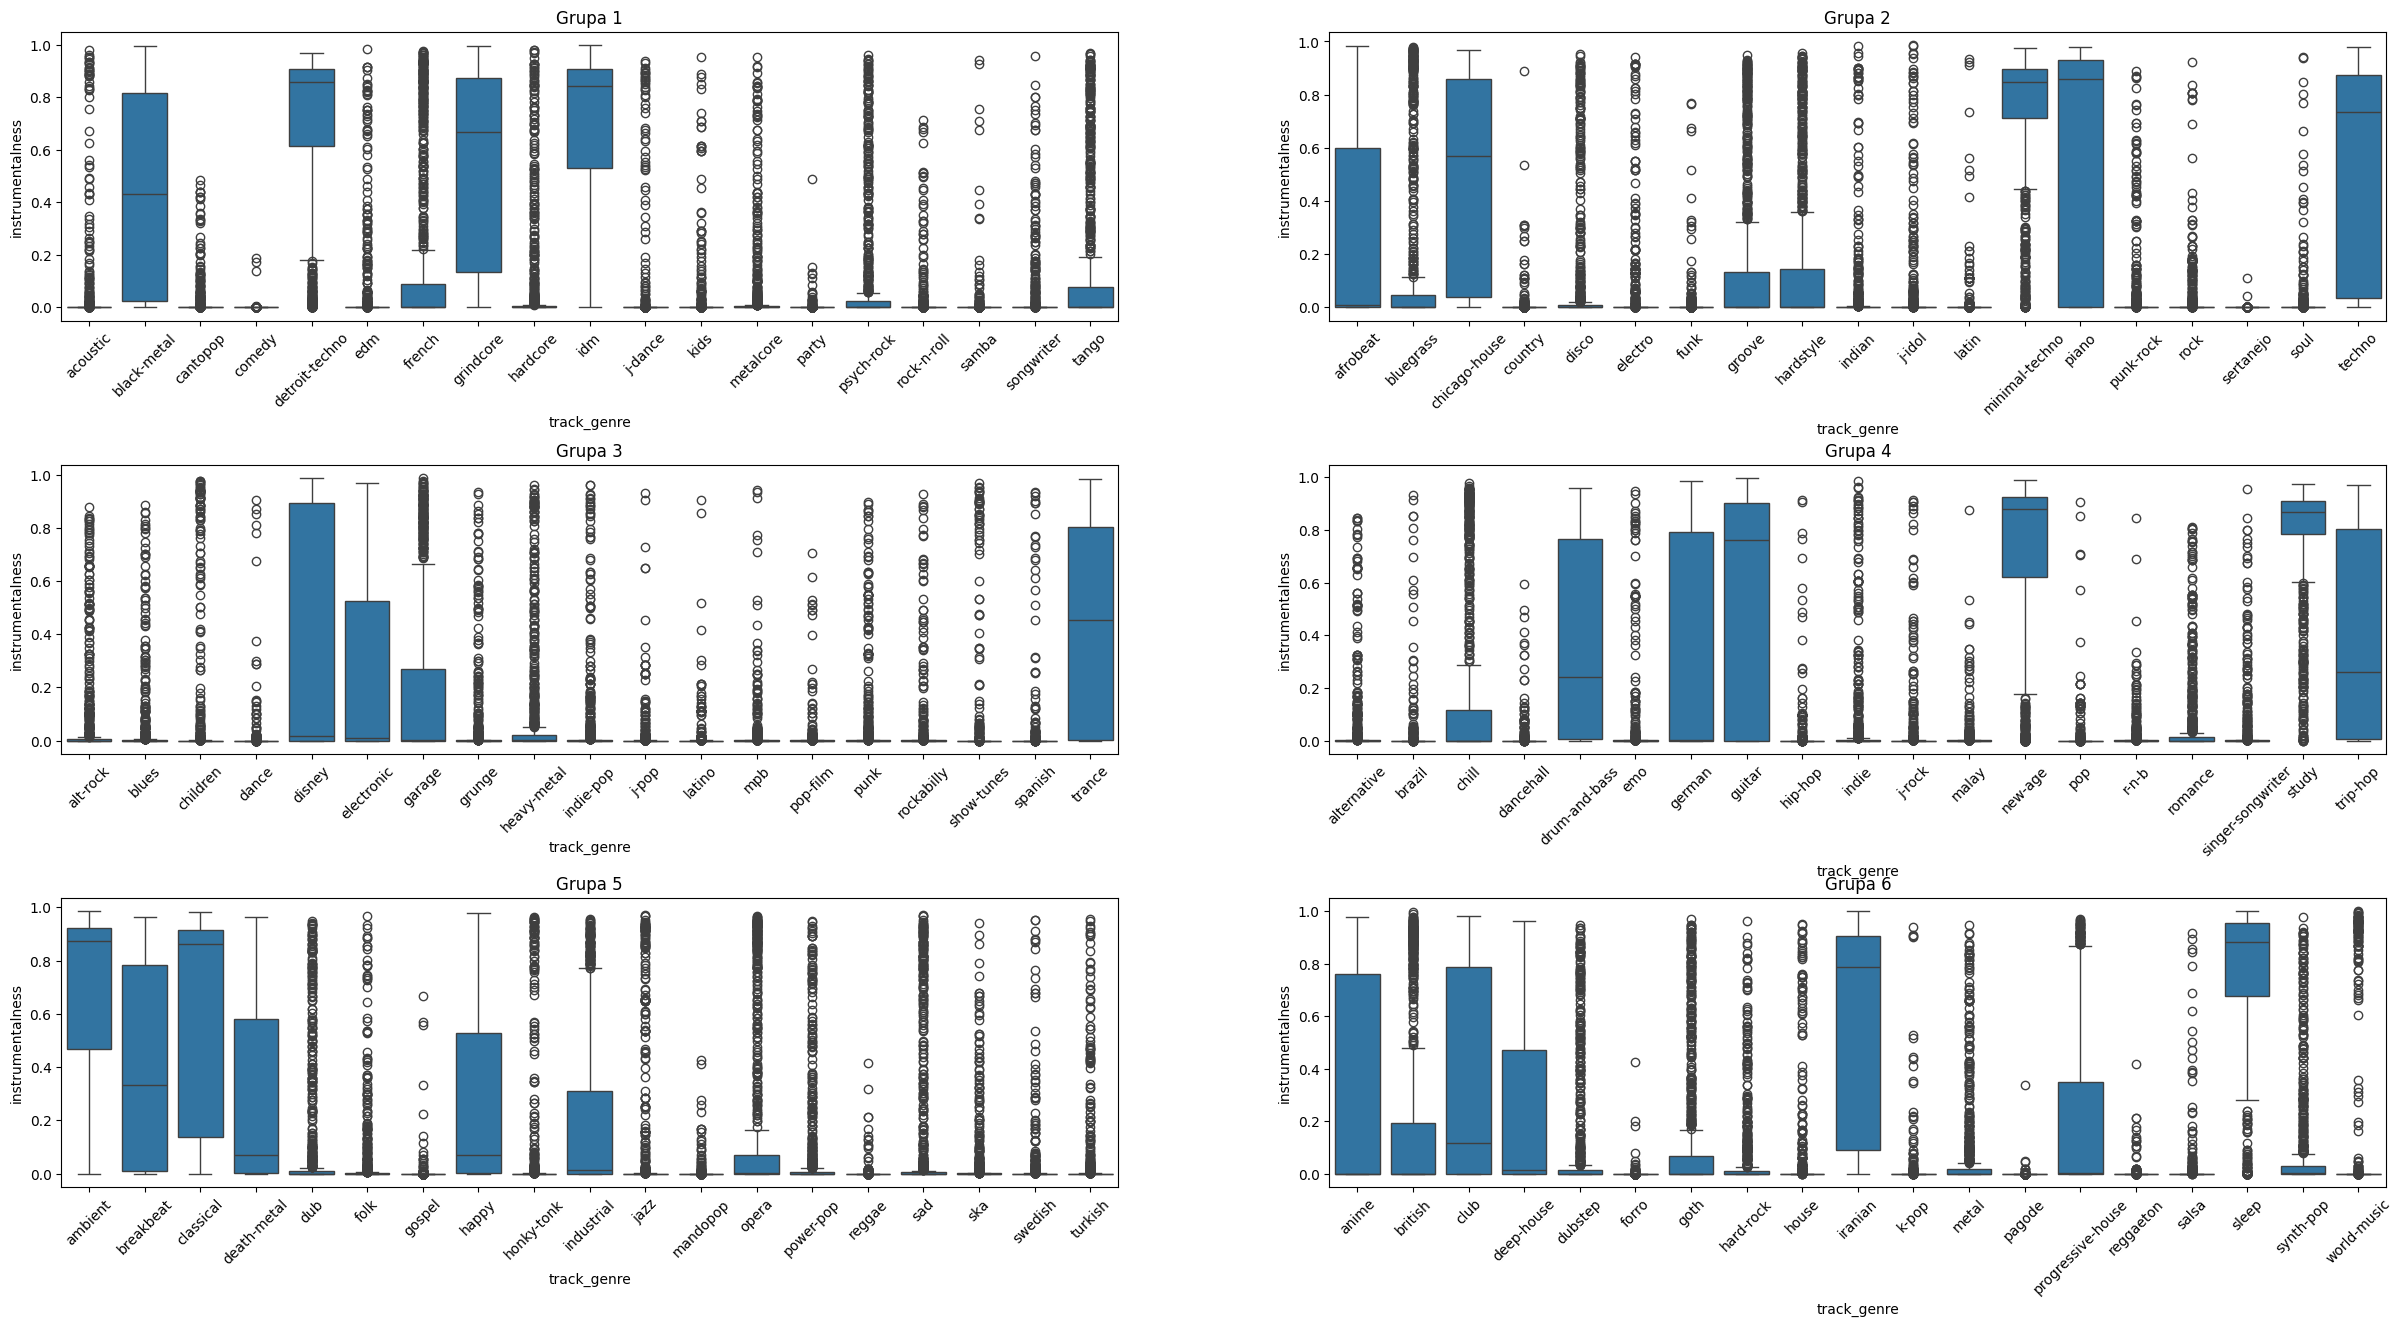

In [110]:
selected_column = 'instrumentalness'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**liveness**

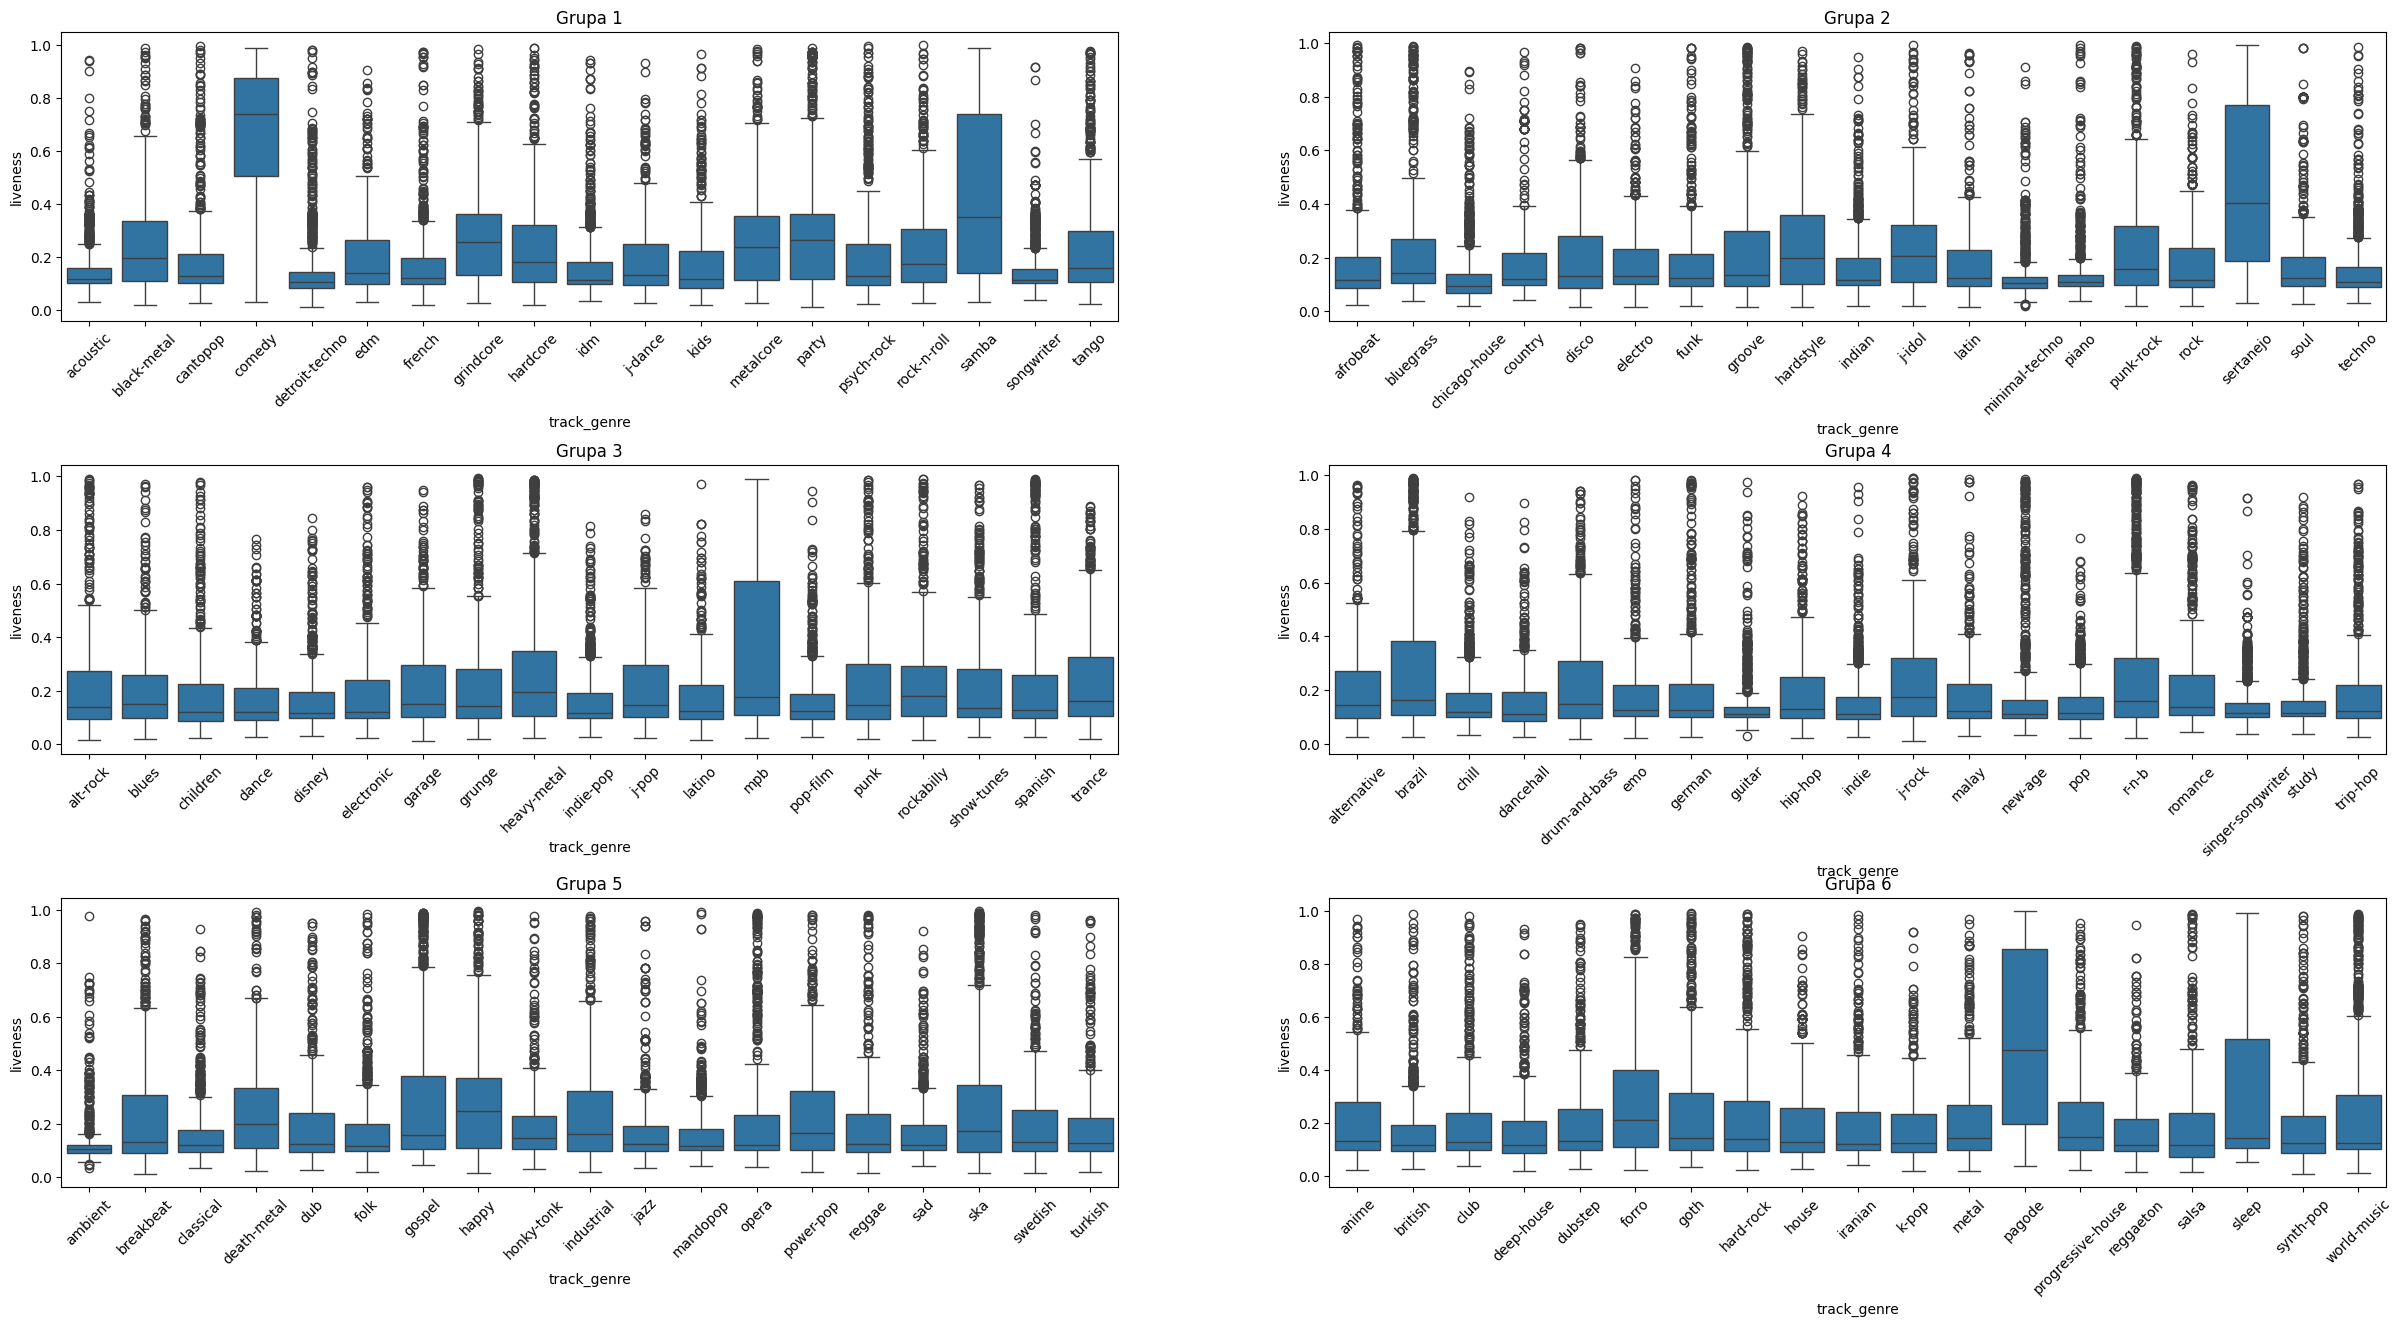

In [111]:
selected_column = 'liveness'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**valence**

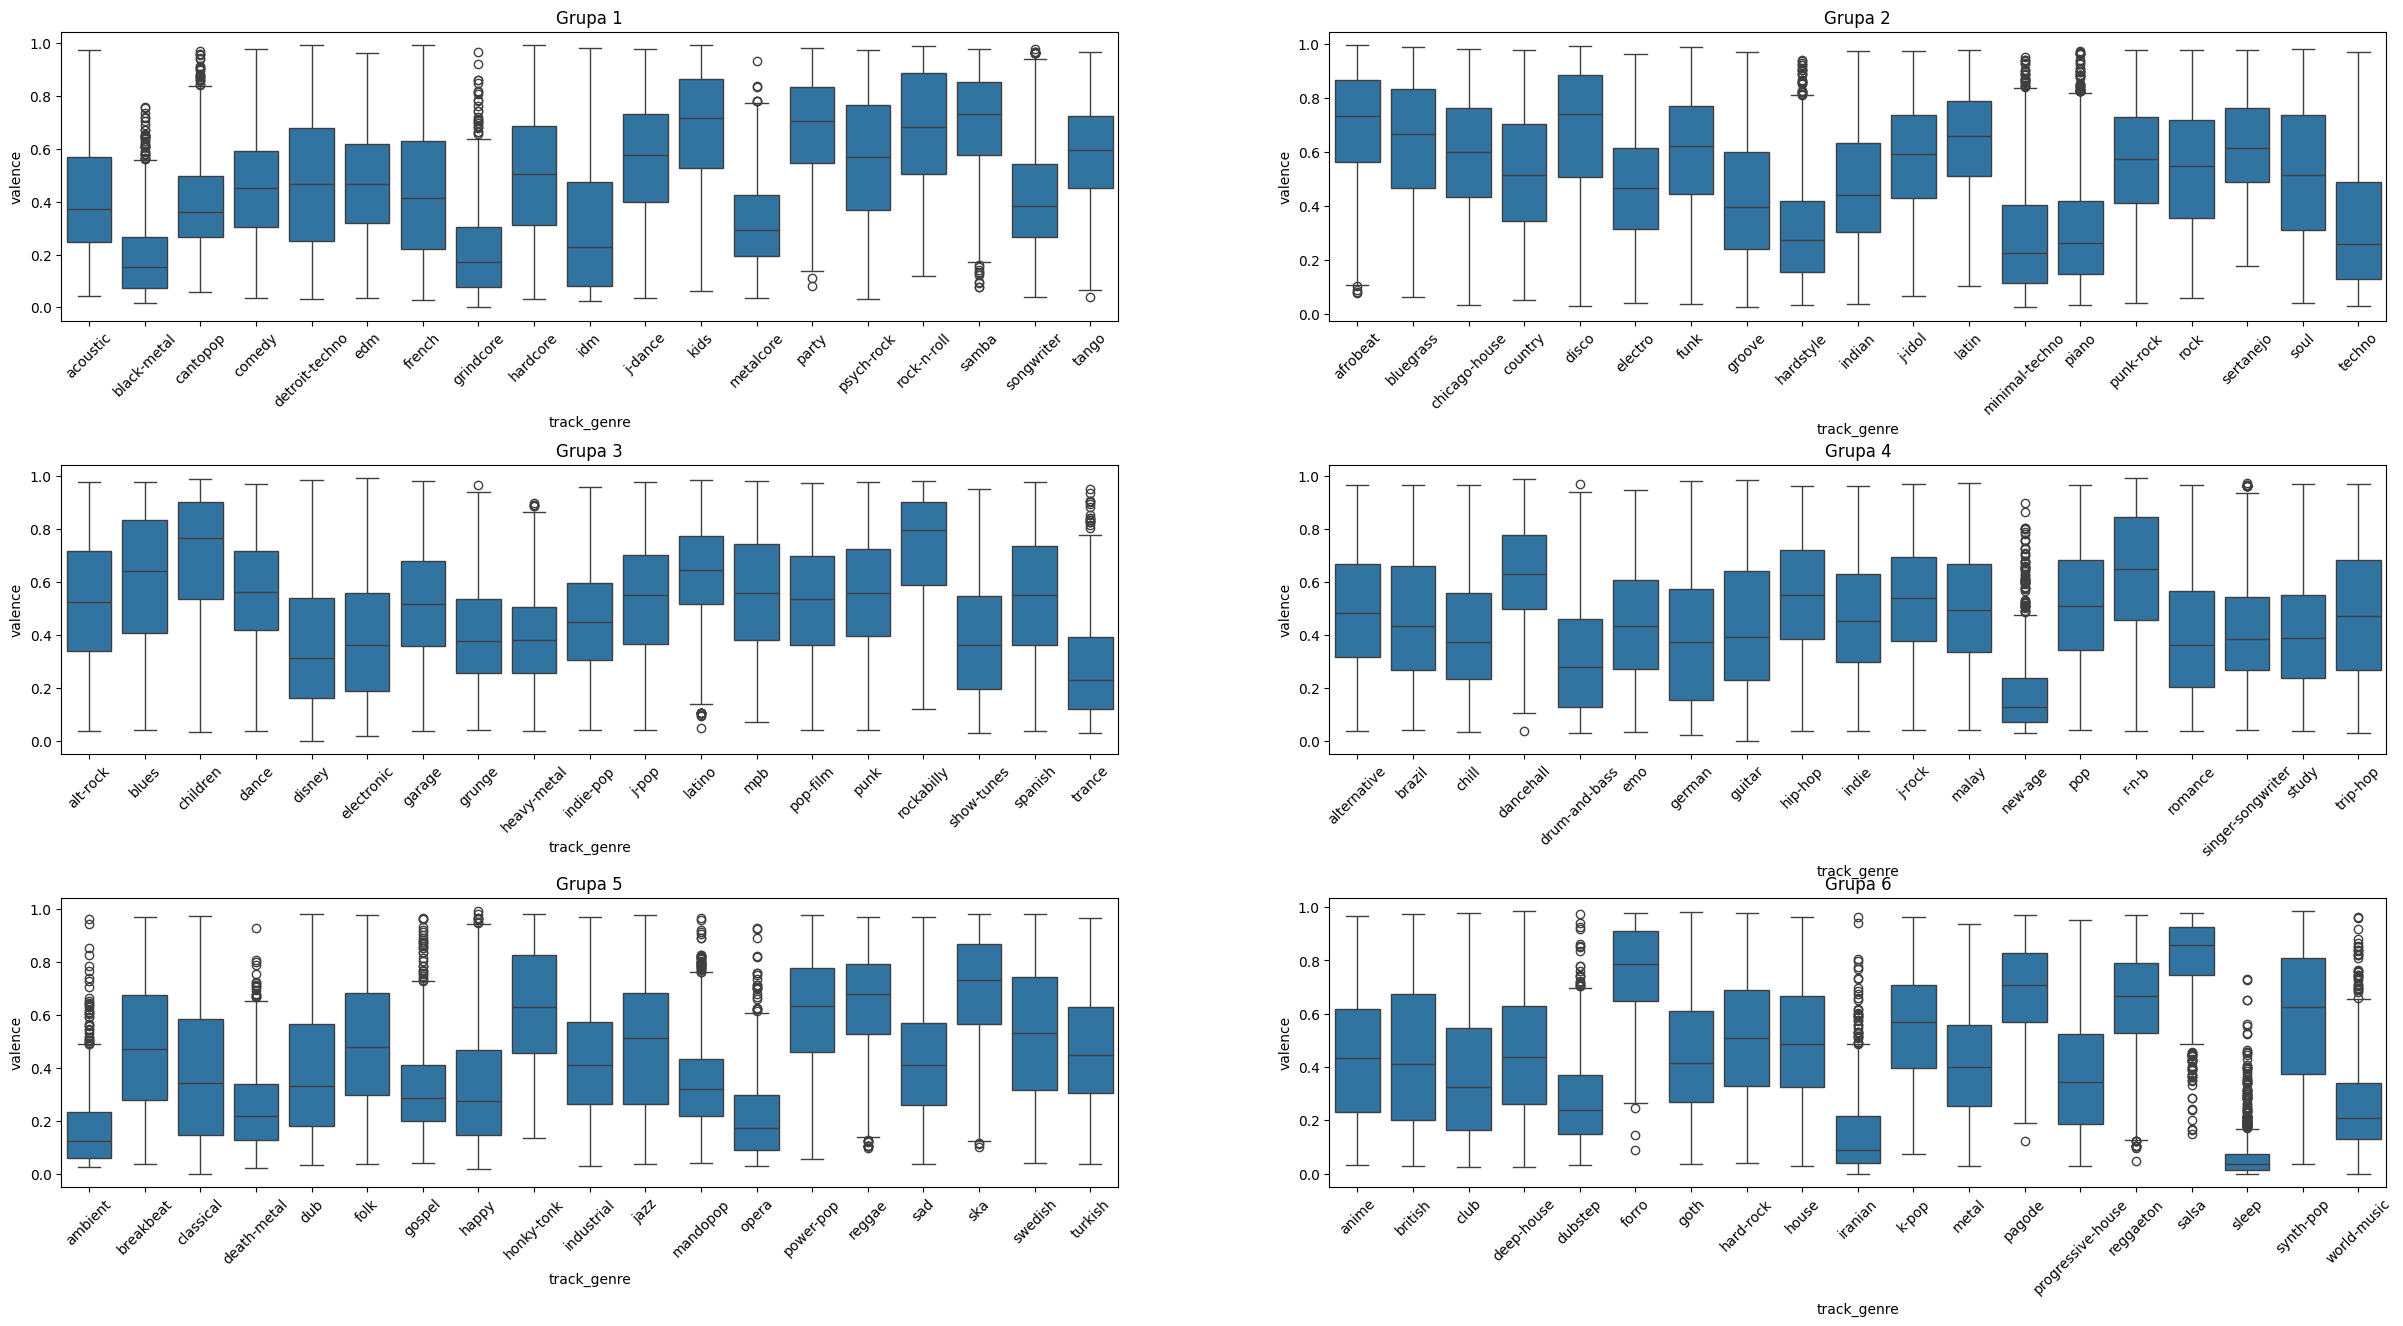

In [112]:
selected_column = 'valence'

plt.figure(figsize=(30, 15))

for i, genre_group in enumerate(split_genres):
    plt.subplot(n_rows, cols, i+1)
    subset = df[df['track_genre'].isin(genre_group)]
    sns.boxplot(data=subset, y=selected_column, x="track_genre", orient="v")
    plt.title(f"Grupa {i+1}")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

####**Wnioski**
Patrząc na boxploty dla każdej zmiennej liczbowej pogrupowane według gatunków, dochodzimy do wniosku, że tych wartości odstających jest o wiele mniej i one nie są problematyczne. To po prostu są rzadkie obiekty, dlatego decydujemy zostawić je w zbiorze.

###**Procent utworów z wulgaryzmami w każdym gatunku**
Pogrupujmy utwory według gatunków i zobaczmy, jaki procent utworów z każdego gatunku zawiera wulgaryzmy.

In [113]:
# Grupowanie według gatunków i obliczanie procentu piosenek z wulgaryzmami
explicit_percent = (
    df.groupby('track_genre')['explicit']
    .mean() # Średnia da nam część piosenek, które mają wulgaryzmy
    .mul(100) # Przeliczenie na procenty
    .reset_index()
    .rename(columns={'explicit': 'explicit_percentage'})
)

explicit_percent_sorted = explicit_percent.sort_values(by='explicit_percentage', ascending=False)

for index, row in explicit_percent_sorted.iterrows():
    print(f"{row['track_genre']}: {row['explicit_percentage']:.2f}%")

comedy: 65.57%
emo: 46.59%
sad: 45.13%
j-dance: 39.07%
hardcore: 32.56%
hip-hop: 31.55%
funk: 30.32%
dancehall: 30.23%
metalcore: 29.31%
death-metal: 25.13%
latino: 24.97%
industrial: 23.49%
french: 22.01%
turkish: 21.89%
reggaeton: 21.24%
dance: 17.40%
chill: 17.20%
reggae: 16.75%
alternative: 16.43%
grindcore: 15.35%
electro: 15.25%
metal: 14.24%
latin: 13.33%
black-metal: 13.27%
german: 12.82%
happy: 12.55%
electronic: 12.05%
house: 10.70%
punk: 10.62%
edm: 10.61%
indie-pop: 10.58%
soul: 10.42%
groove: 9.73%
hardstyle: 9.63%
swedish: 9.56%
garage: 9.54%
dubstep: 9.54%
r-n-b: 8.69%
club: 8.57%
brazil: 8.44%
heavy-metal: 8.32%
indie: 8.29%
iranian: 8.27%
punk-rock: 8.02%
pop: 7.49%
dub: 7.41%
grunge: 7.24%
goth: 6.62%
alt-rock: 5.61%
anime: 5.44%
acoustic: 5.25%
progressive-house: 5.21%
k-pop: 4.93%
hard-rock: 4.91%
breakbeat: 4.80%
songwriter: 4.61%
singer-songwriter: 4.61%
trip-hop: 4.53%
party: 4.52%
synth-pop: 4.41%
rock: 4.30%
british: 3.94%
spanish: 3.81%
malay: 3.70%
power-pop:

Największy procent piosenek (65,57 %) z wulgaryzmami ma gatunek comedy. Na drugim miejscu jest gatunek emo (46,59 %), a na trzecim gatunek sad (45,13 %).

Spory procent piosenek z wulgaryzmami mają też takie gatunki, jak hip-hop, hardcore (gatunek wyrażający intensywne emocje w brzmieniu i tekstach) , czy j-dance (gatunek związany z japońską muzyką).

Można też zauważyć, że w zbiorze tym jest kilka piosenek z Disneya, które zawierają wulgaryzmy.

Dodanie kolumny klasyfikującej długość utworu w zależności długości trwania i gatunku

In [ ]:
stats = df.groupby('track_genre')['duration_ms'].agg(['median'])
stats['Q1'] = df.groupby('track_genre')['duration_ms'].quantile(0.25)
stats['Q3'] = df.groupby('track_genre')['duration_ms'].quantile(0.75)

def categorize_duration_by_genre(row, stats):
    genre = row['track_genre']
    duration = row['duration_ms']

    Q1 = stats.loc[genre, 'Q1']
    Q3 = stats.loc[genre, 'Q3']

    #0 - krótki utwór, 1 - średni utwór, 2 - długi utwór
    if duration < Q1:
        return 0
    elif Q1 <= duration <= Q3:
        return 1
    else:
        return 2

df['duration_category'] = df.apply(categorize_duration_by_genre, axis=1, args=(stats,))

In [ ]:
stats

median         Q1         Q3
track_genre                                
acoustic     216820.5  183187.75  244800.00
afrobeat     227826.0  194403.00  263320.00
alt-rock     224213.0  195493.00  250786.00
alternative  213946.0  182903.00  243244.50
ambient      208621.0  158132.50  270882.50
...               ...        ...        ...
techno       369303.0  251517.00  432789.00
trance       239984.0  191995.50  384720.00
trip-hop     256232.5  218556.00  305716.25
turkish      214546.0  187950.75  252457.75
world-music  273107.0  239714.25  318209.50

[114 rows x 3 columns]

Dodawana jest nowa kolumna duration_category, która przypisuje utworom jedną z trzech kategorii długości (krótki, średni, długi) w zależności od długości utworu (duration_ms) i gatunku (track_genre).

Obiekt stats przechowuje podstawowe statystyki dla zmiennej duration_ms dla każdego gatunku. Median to mediana długości utworu dla danego gatunku, Q1 to pierwszy kwartyl (25. percentyl) dla danego gatunku, a Q3 to trzeci kwartyl (75. percentyl) dla danego gatunku.

Jeśli czas trwania jest krótszy niż pierwszy kwartyl (Q1), utwór otrzymuje kategorię 0 (krótki). Jeśli czas trwania mieści się między Q1 a Q3, utwór otrzymuje kategorię 1 (średni). Jeśli czas trwania przekracza trzeci kwartyl (Q3), utwór otrzymuje kategorię 2 (długi).

Standaryzacja

Kolumny takie jak duration_ms, loudness, tempo mogą mieć różne skale, co może wpłynąć później na działanie modelu. Wartości tych cech zostaną ustandaryzowane (skalowanie tak, by średnia wynosiła 0, a odchylenie standardowe 1).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['duration_ms', 'loudness', 'tempo']] = scaler.fit_transform(df[['duration_ms', 'loudness', 'tempo']])

Dodanie cech interakcji

Zostaną dodane cechy interakcji, aby uchwycić współdziałanie między niektórymi cechami.

In [ ]:
df['danceability_energy'] = df['danceability'] * df['energy']
df['danceability_valence'] = df['danceability'] * df['valence']
df['tempo_energy'] = df['tempo'] * df['energy']

Zmiana typu kolumny explicit z boolean na int

In [ ]:
df['explicit'] = df['explicit'].astype(int)

**Zadanie badawcze**: Jakie czynniki najbardziej wpływają na popularność utworu?